Packages

In [243]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams

from sklearn import neighbors
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, accuracy_score
import random




from sklearn import metrics

In [244]:
pd.set_option('display.max_columns', None)

Importing files and concatenation

In [245]:
excel_file_path = "..\data\original\LAEI2013_MajorRoads_EmissionsbyLink_2013.xlsx"

In [246]:
df1 = pd.read_excel(excel_file_path, sheet_name='2013 LTS Rds')
df2 = pd.read_excel(excel_file_path, sheet_name='2013 Other Major Rds')

In [247]:
df_ = pd.concat([df1, df2], ignore_index=True)

In [248]:
df_.shape

(879960, 33)

In [249]:
df_.to_csv('..\data\processed\df_.csv', index=False)

In [250]:
df_ = pd.read_csv('..\data\processed\df_.csv')

In [251]:
df_ = df_[['GridId','Length (m)','Pollutant','Motorcycle','Taxi','Car','BusAndCoach','Lgv','Rigid','Artic','Rigid2Axle','Rigid3Axle','Rigid4Axle','Artic3Axle','Artic5Axle','Artic6Axle',
           'PetrolCar','DieselCar','PetrolLgv','DieselLgv',	'LtBus','Coach','ElectricCar','ElectricLgv']]


In [252]:
df_.shape

(879960, 24)

In [253]:
df_=df_.loc[~(df_.iloc[:, 2:]==0).all(axis=1)]

In [254]:
df_.shape

(879960, 24)

In [255]:
df_.to_csv('..\data\processed\combined_csv_file.csv', index=False)

Explorative data analysis

In [256]:
df= pd.read_csv('..\data\processed\combined_csv_file.csv')

In [257]:
# shuggle the data
df.sample(frac=1)

GridId  Length (m)     Pollutant  Motorcycle          Taxi        Car  \
252333   12793   12.005378    PM25_Brake    0.000002  1.068580e-07   0.000574   
540528    9351   40.459817  PM10_Exhaust    0.000039  1.304358e-04   0.002667   
449088   10215   43.294918           NOx    0.000668  1.714552e-03   0.058479   
395497   10076   35.407067           CO2    0.103916  2.055661e-01  13.615714   
682991    8008   22.776069    PM25_Brake    0.000012  2.723996e-05   0.002362   
...        ...         ...           ...         ...           ...        ...   
218996   13497   13.580030     PM10_Tyre    0.000004  9.575401e-06   0.000437   
701286    9889   29.554286    PM25_Brake    0.000095  2.029827e-04   0.001887   
350299   10417   32.647008     PM25_Tyre    0.000001  2.646709e-06   0.000148   
118695    8507   14.527087  PM10_Exhaust    0.000016  6.107918e-05   0.000491   
504190   10592   50.148471    PM10_Brake    0.000030  1.116531e-04   0.009459   

        BusAndCoach       Lgv     Rigid     Artic  Rigid2Axle  Rigid3Axle  \
252333     0.000042  0.000058  0.000041  0.000009    0.000033    0.000003   
540528     0.000212  0.001281  0.000609  0.000099    0.000313    0.000078   
449088     0.007122  0.014537  0.006444  0.000000    0.004945    0.000744   
395497     4.915612  1.684147  0.520154  0.041835    0.270426    0.201351   
682991     0.000693  0.000322  0.000181  0.000006    0.000152    0.000020   
...             ...       ...       ...       ...         ...         ...   
218996     0.000016  0.000077  0.000061  0.000030    0.000049    0.000005   
701286     0.000506  0.000952  0.000660  0.000033    0.000474    0.000092   
350299     0.000000  0.000026  0.000012  0.000002    0.000011    0.000000   
118695     0.000109  0.000266  0.000063  0.000024    0.000042    0.000008   
504190     0.001563  0.001739  0.000272  0.000039    0.000209    0.000028   

        Rigid4Axle  Artic3Axle  Artic5Axle  Artic6Axle  PetrolCar  DieselCar  \
252333    0.000005    0.000003    0.000004    0.000002   0.000360   0.000214   
540528    0.000217    0.000019    0.000024    0.000056   0.000304   0.002363   
449088    0.000754    0.000000    0.000000    0.000000   0.020758   0.037722   
395497    0.048377    0.000000    0.000000    0.041835   8.788308   4.827406   
682991    0.000008    0.000003    0.000002    0.000001   0.001482   0.000879   
...            ...         ...         ...         ...        ...        ...   
218996    0.000008    0.000010    0.000013    0.000007   0.000274   0.000163   
701286    0.000094    0.000000    0.000007    0.000026   0.001184   0.000702   
350299    0.000002    0.000000    0.000002    0.000000   0.000093   0.000055   
118695    0.000013    0.000007    0.000011    0.000006   0.000053   0.000438   
504190    0.000035    0.000014    0.000009    0.000016   0.005935   0.003521   

           PetrolLgv  DieselLgv     LtBus     Coach   ElectricCar  \
252333  1.126603e-06   0.000057  0.000042  0.000000  1.910587e-07   
540528  1.442767e-06   0.001279  0.000105  0.000106  0.000000e+00   
449088  2.031705e-04   0.014334  0.000000  0.007122  0.000000e+00   
395497  3.569311e-02   1.648454  4.915612  0.000000  0.000000e+00   
682991  6.275798e-06   0.000315  0.000425  0.000269  7.858004e-07   
...              ...        ...       ...       ...           ...   
218996  1.497268e-06   0.000075  0.000016  0.000000  1.454642e-07   
701286  1.855958e-05   0.000933  0.000484  0.000022  6.276220e-07   
350299  5.058208e-07   0.000025  0.000000  0.000000  4.917587e-08   
118695  2.657794e-07   0.000266  0.000085  0.000024  0.000000e+00   
504190  3.391677e-05   0.001704  0.001563  0.000000  3.146732e-06   

         ElectricLgv  
252333  3.240445e-08  
540528  0.000000e+00  
449088  0.000000e+00  
395497  0.000000e+00  
682991  1.805105e-07  
...              ...  
218996  4.306586e-08  
701286  5.338285e-07  
350299  1.454891e-08  
118695  0.000000e+00  
504190  9.755468e-07  

[879960 rows x 24 columns]

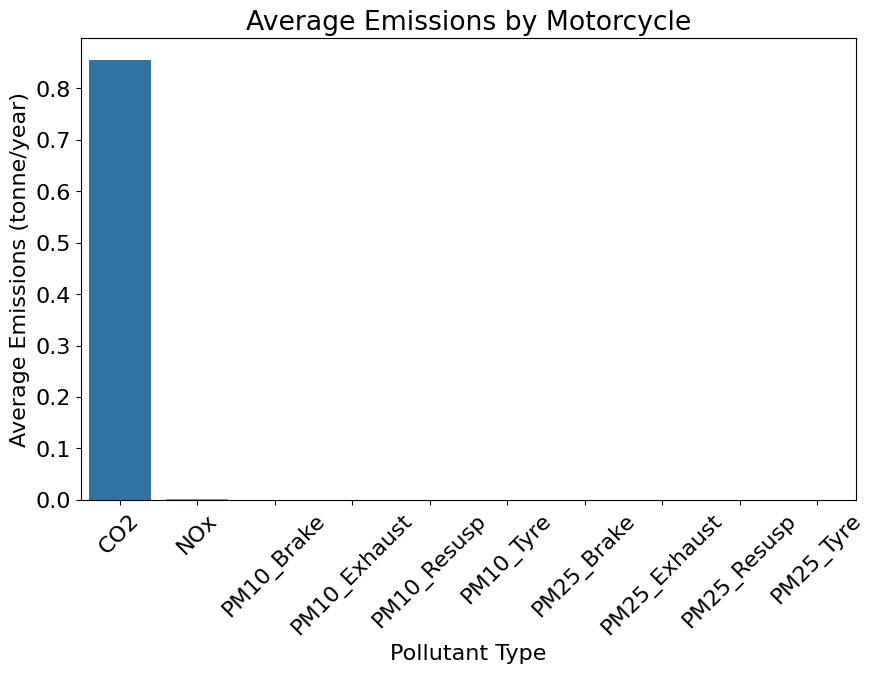

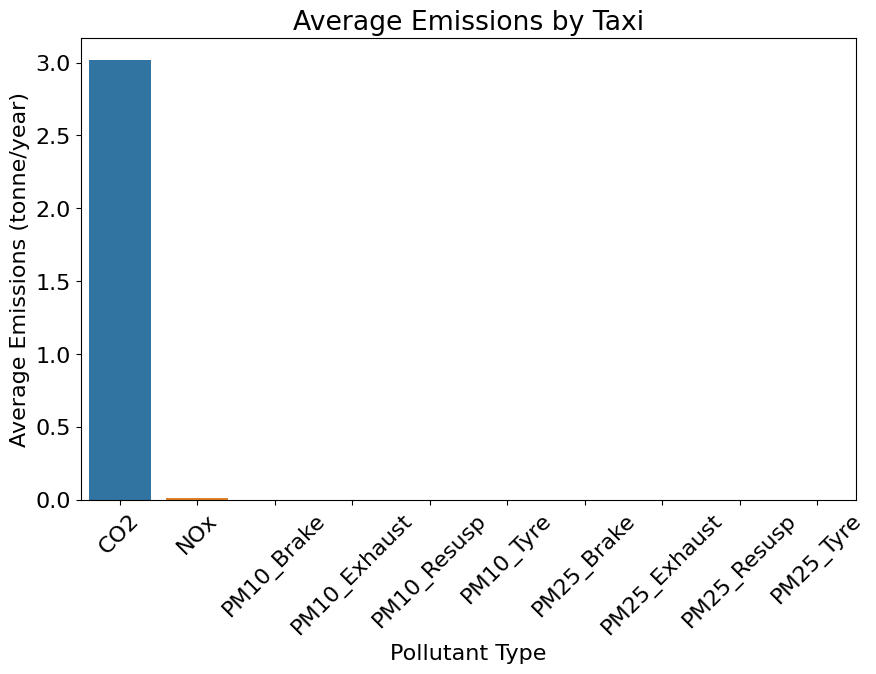

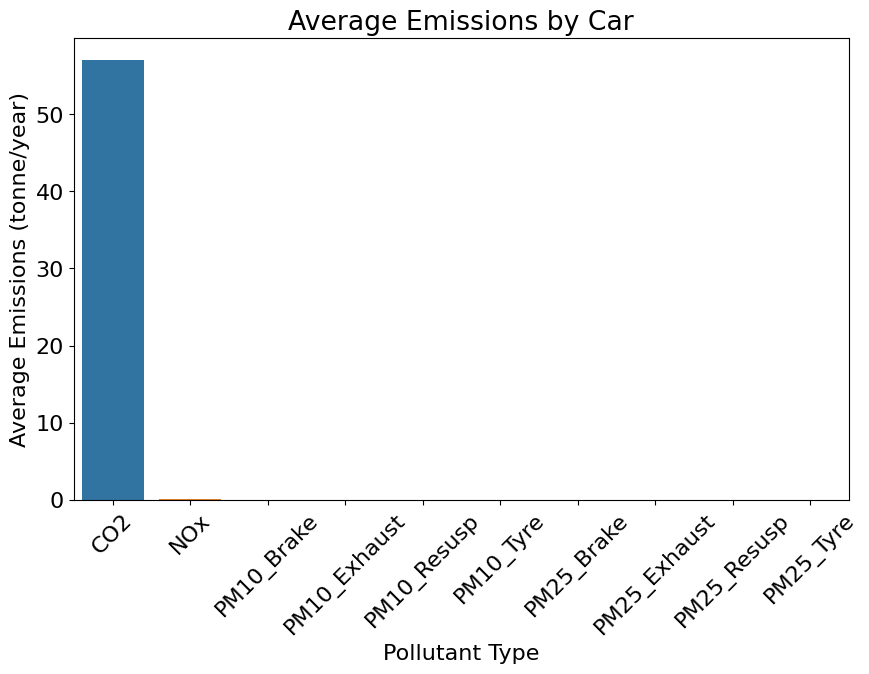

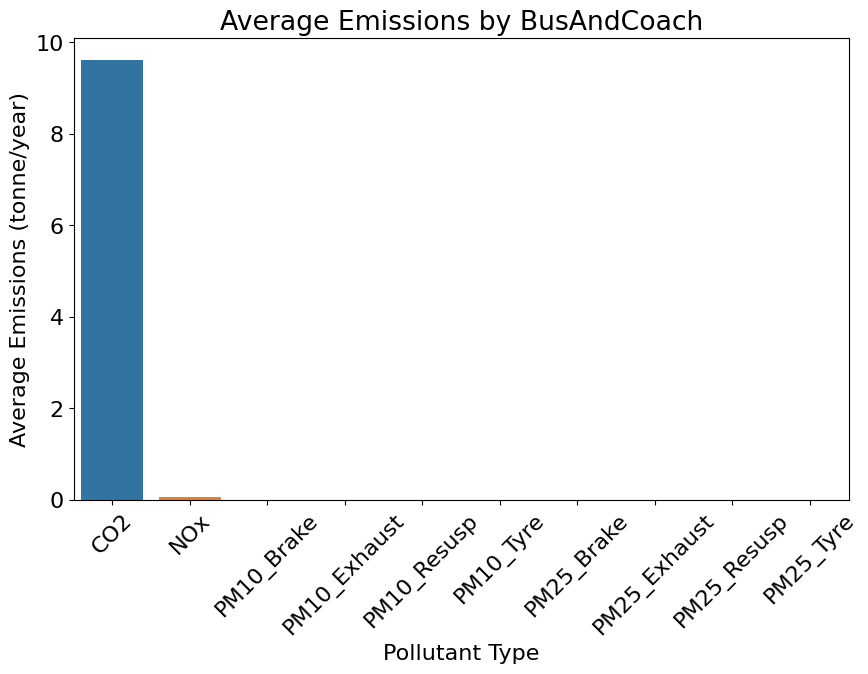

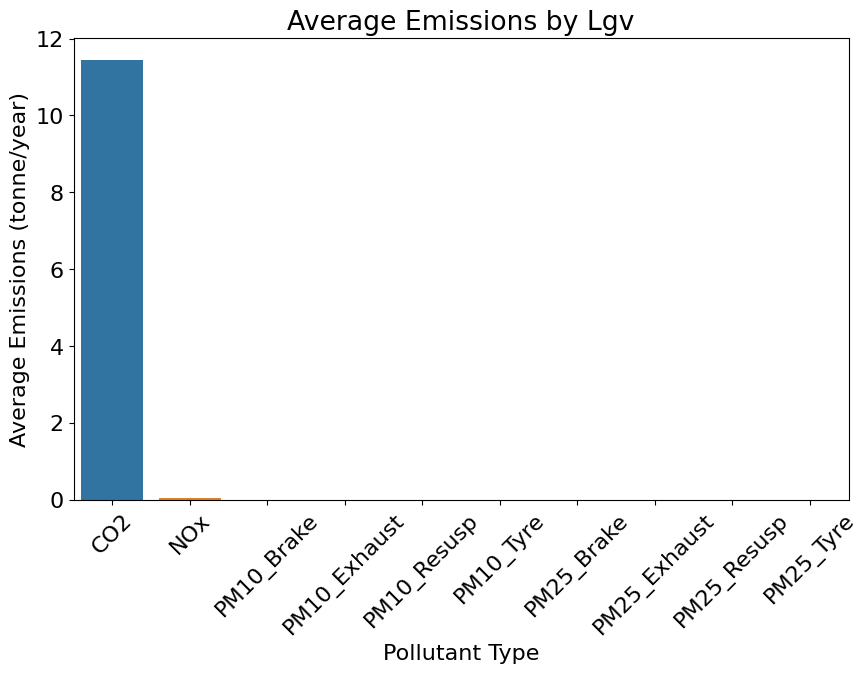

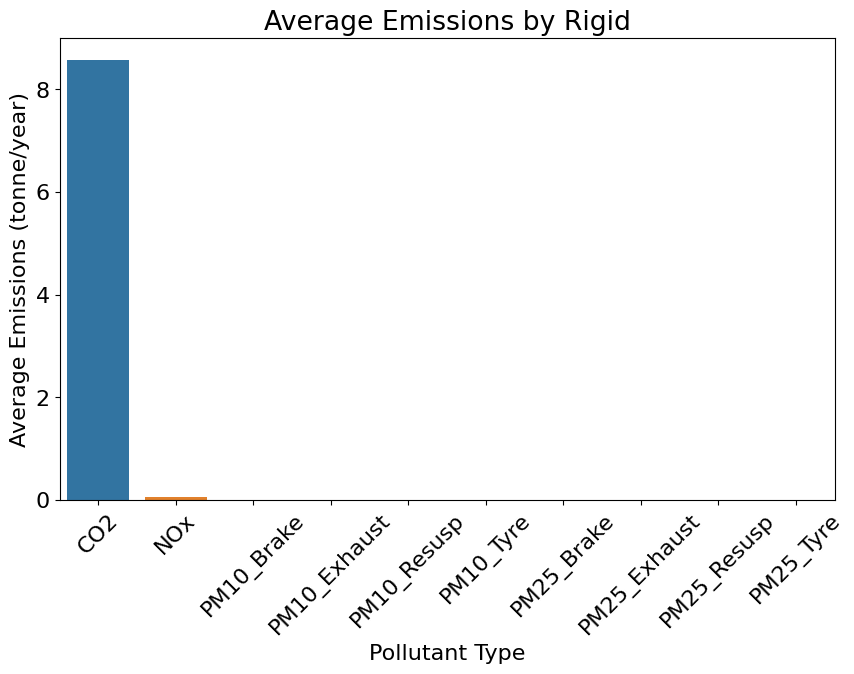

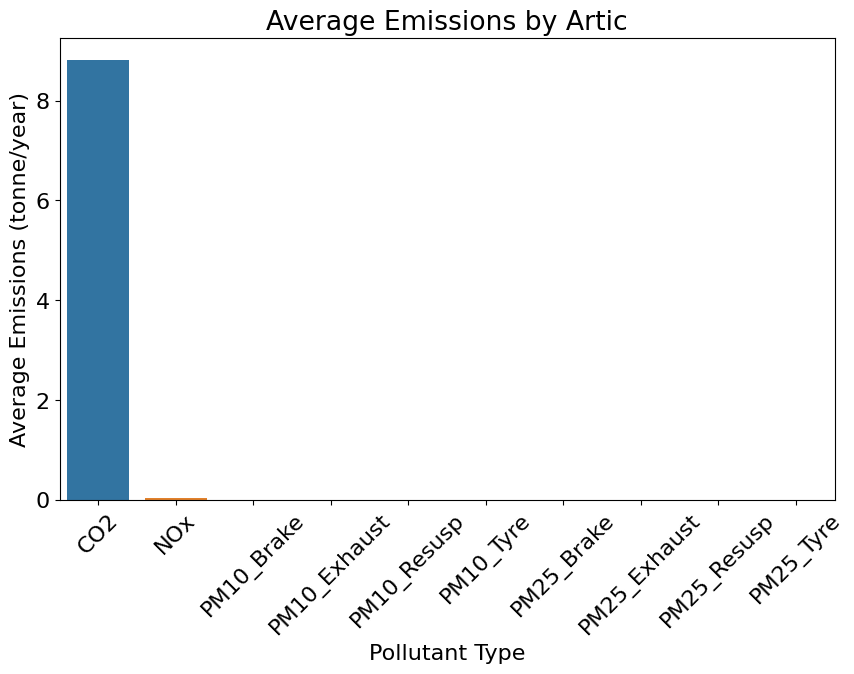

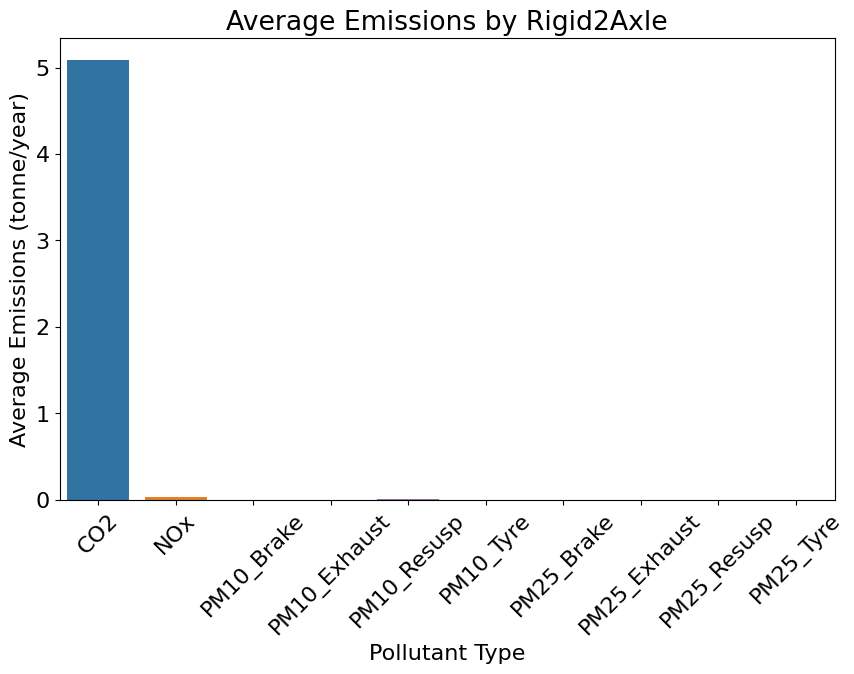

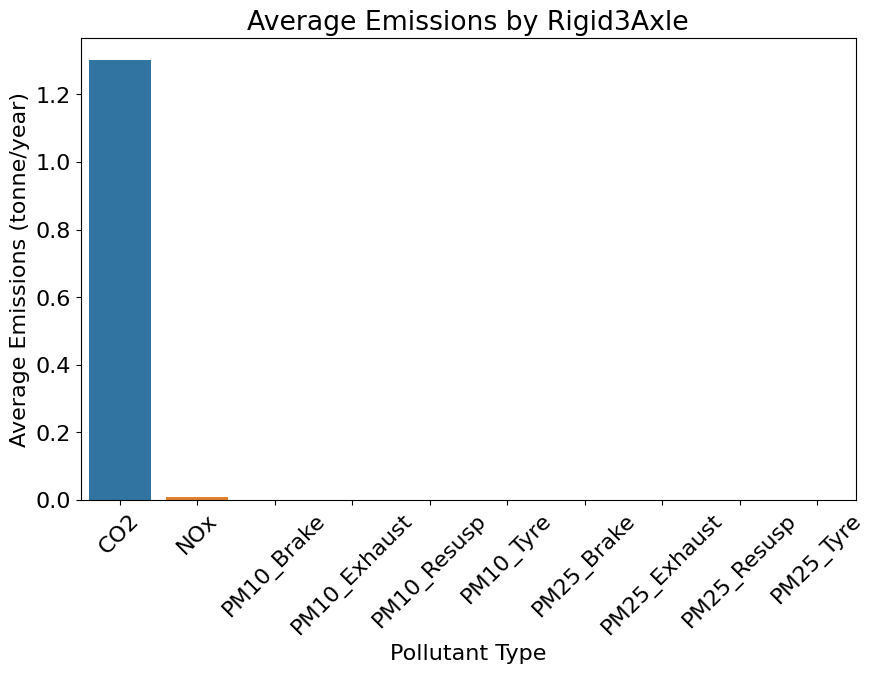

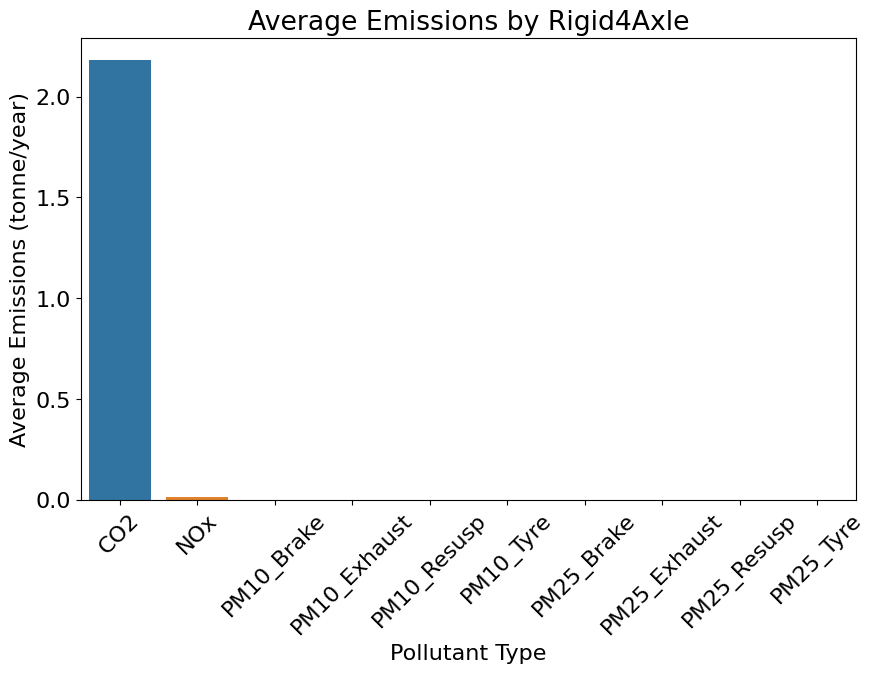

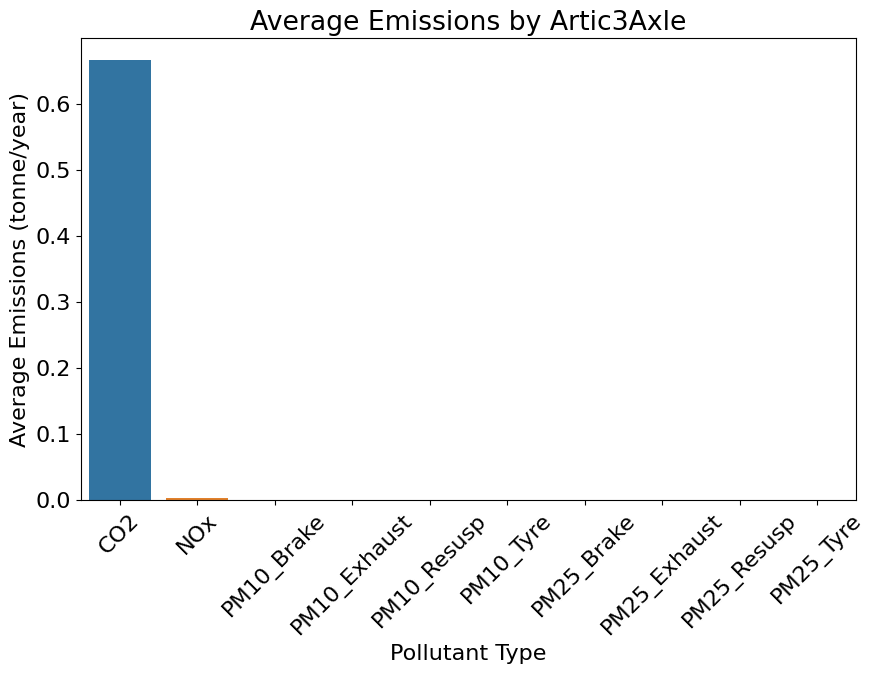

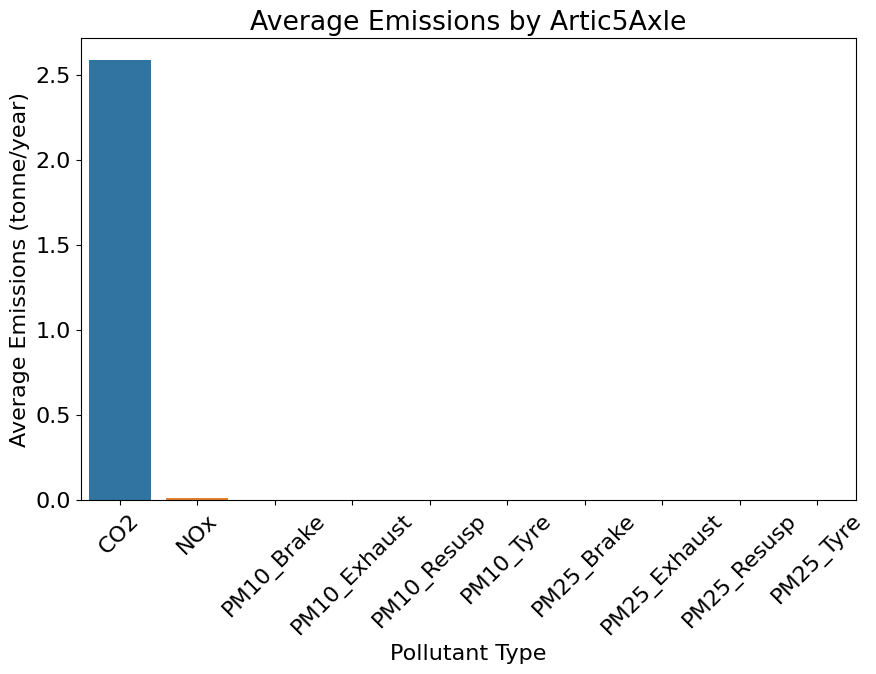

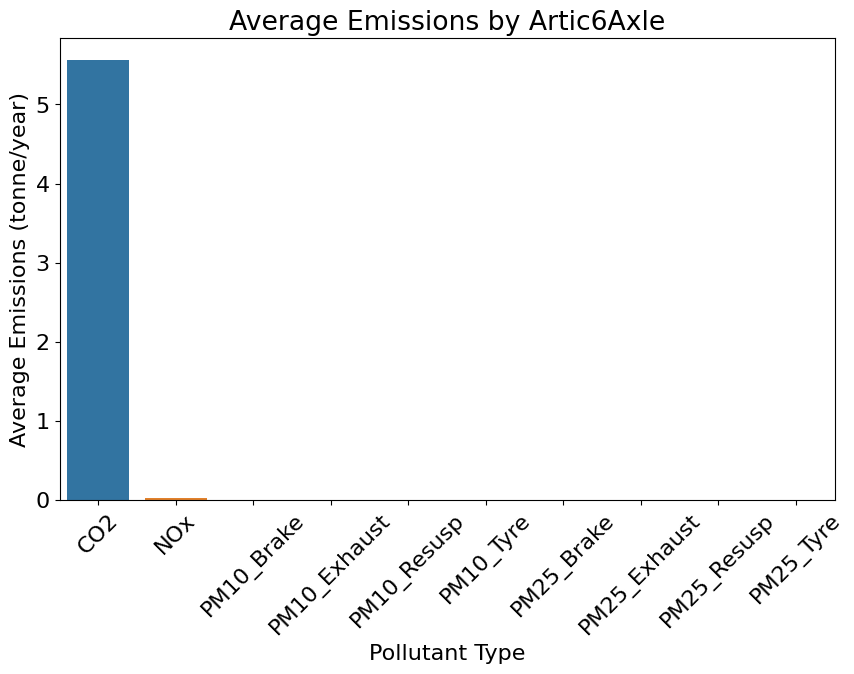

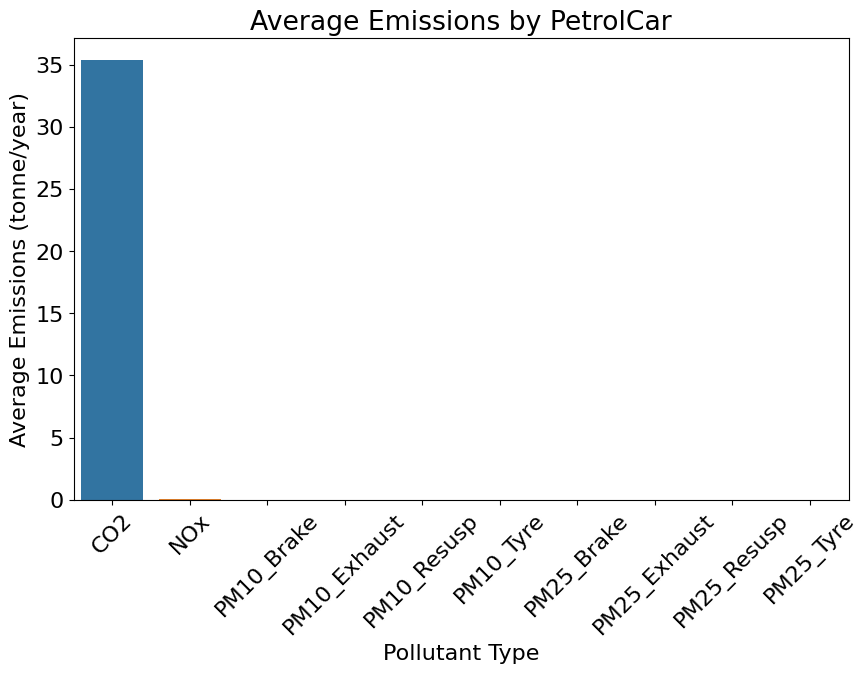

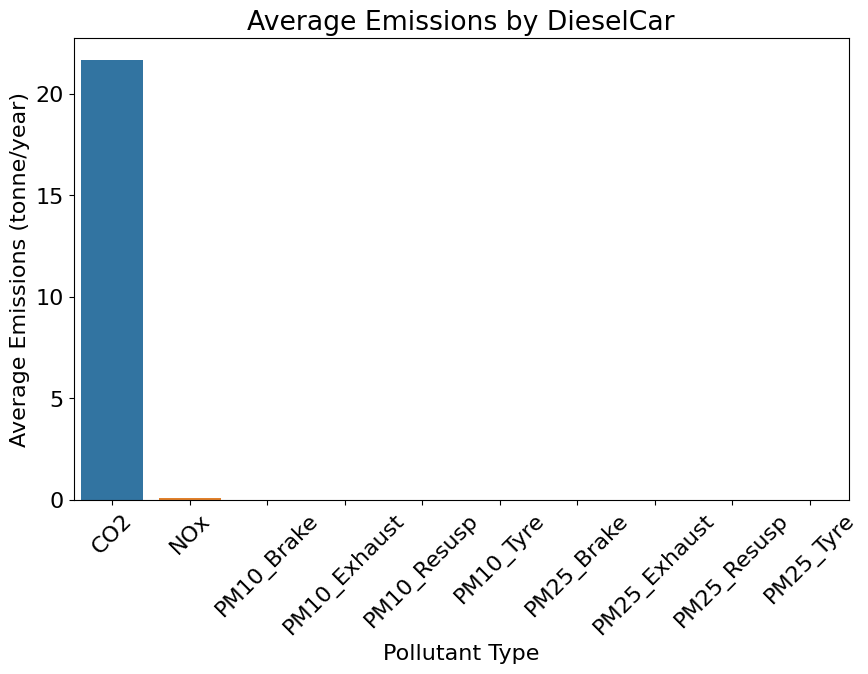

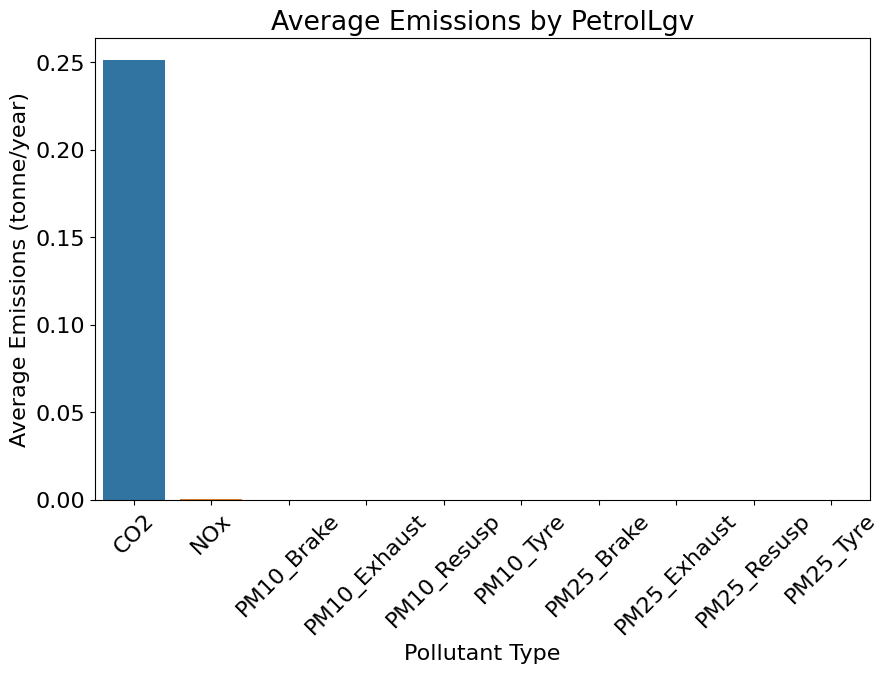

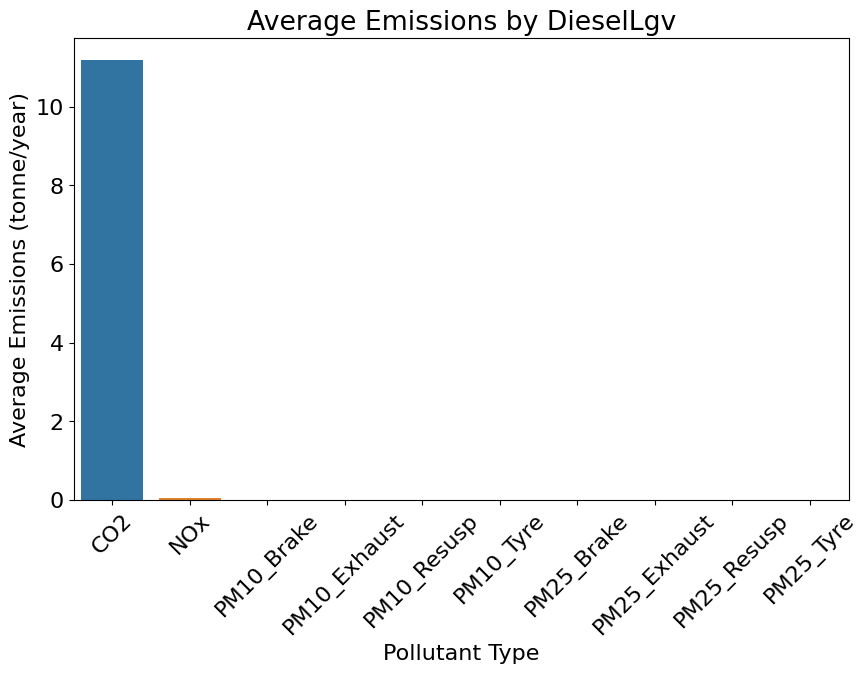

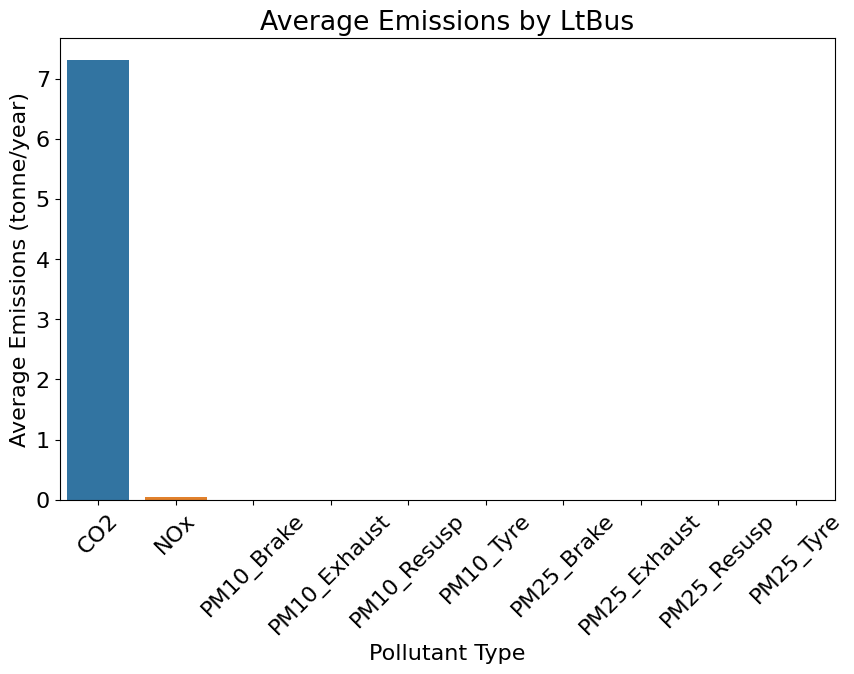

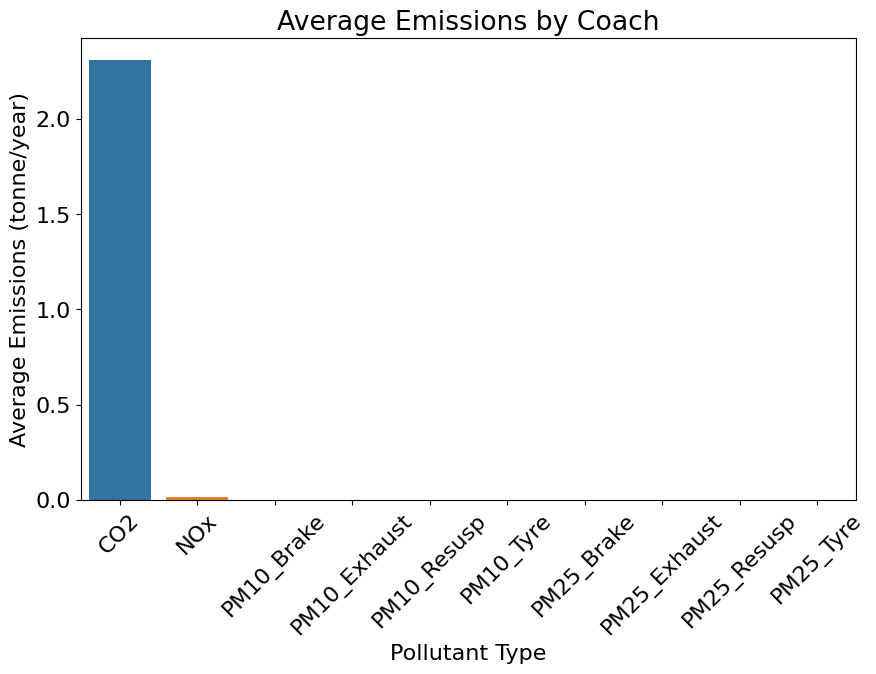

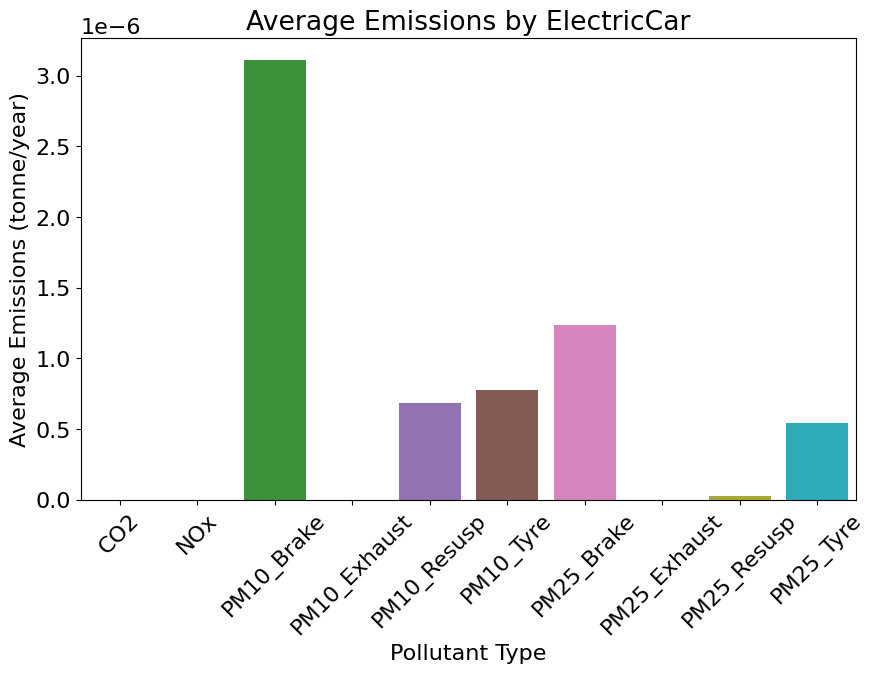

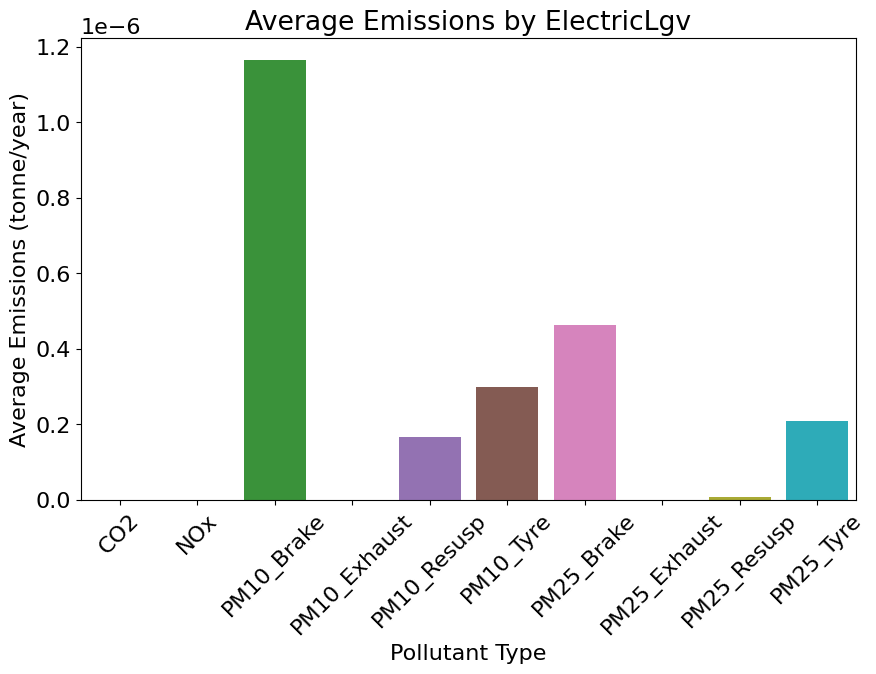

In [258]:


vehicle_types = ['Motorcycle','Taxi','Car','BusAndCoach','Lgv','Rigid','Artic','Rigid2Axle','Rigid3Axle','Rigid4Axle','Artic3Axle','Artic5Axle','Artic6Axle',
           'PetrolCar','DieselCar','PetrolLgv','DieselLgv',	'LtBus','Coach','ElectricCar','ElectricLgv']

 

# Iterating over each vehicle type and plotting average emissions for each pollutant
for vehicle_type in vehicle_types:
    plt.figure(figsize=(10,6))
    sns.barplot(x='Pollutant', y=vehicle_type, data=df, estimator=np.mean, errorbar=None)
    plt.title(f'Average Emissions by {vehicle_type}')
    plt.ylabel('Average Emissions (tonne/year)')
    plt.xlabel('Pollutant Type')
    plt.xticks(rotation=45)
    plt.savefig(f'../data/processed/figures/Pollutant_representation_{vehicle_type}.png')
    plt.show()

In [259]:
df.describe()

GridId     Length (m)     Motorcycle           Taxi  \
count  879960.000000  879960.000000  879960.000000  879960.000000   
mean     9976.935281      56.595228       0.085730       0.303153   
std      1741.792045      77.177292       0.703626       3.295437   
min      5911.000000       0.000000       0.000000       0.000000   
25%      8686.000000      11.074534       0.000000       0.000007   
50%      9885.000000      30.413813       0.000015       0.000050   
75%     11113.000000      73.016143       0.000111       0.000446   
max     14708.000000    1275.112939      59.224836     381.310905   

                 Car    BusAndCoach            Lgv          Rigid  \
count  879960.000000  879960.000000  879960.000000  879960.000000   
mean        5.719720       0.969543       1.149579       0.863411   
std        56.359799       6.662616      13.981426       9.386783   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000256       0.000025       0.000056       0.000053   
50%         0.001345       0.000214       0.000337       0.000276   
75%         0.007997       0.001805       0.002129       0.002456   
max      4093.750078     810.700003    1143.875444     762.037987   

               Artic     Rigid2Axle     Rigid3Axle     Rigid4Axle  \
count  879960.000000  879960.000000  879960.000000  879960.000000   
mean        0.885791       0.512707       0.131116       0.219588   
std        23.984173       5.081405       1.695935       2.959320   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000006       0.000041       0.000004       0.000004   
50%         0.000046       0.000208       0.000025       0.000031   
75%         0.000439       0.001837       0.000222       0.000303   
max      2599.249016     347.751394     163.963401     397.245904   

         Artic3Axle     Artic5Axle     Artic6Axle      PetrolCar  \
count  8.799600e+05  879960.000000  879960.000000  879960.000000   
mean   6.704258e-02       0.260057       0.558692       3.542802   
std    1.073286e+00       7.208672      16.653397      31.623198   
min    0.000000e+00       0.000000       0.000000       0.000000   
25%    8.804373e-07       0.000002       0.000001       0.000082   
50%    9.051430e-06       0.000016       0.000014       0.000538   
75%    7.817485e-05       0.000148       0.000149       0.003939   
max    9.826288e+01     810.759132    1747.210798    2111.626288   

           DieselCar     PetrolLgv      DieselLgv          LtBus  \
count  879960.000000  8.799600e+05  879960.000000  879960.000000   
mean        2.176918  2.521199e-02       1.124366       0.736786   
std        25.482011  3.344399e-01      13.651971       5.556757   
min         0.000000  0.000000e+00       0.000000       0.000000   
25%         0.000118  4.007403e-07       0.000055       0.000000   
50%         0.000651  3.095451e-06       0.000332       0.000104   
75%         0.003961  2.748446e-05       0.002102       0.000996   
max      2092.318460  2.938560e+01    1114.489847     679.581849   

               Coach   ElectricCar   ElectricLgv  
count  879960.000000  8.799600e+05  8.799600e+05  
mean        0.232757  6.385968e-07  2.312402e-07  
std         2.669730  2.324720e-06  9.470474e-07  
min         0.000000  0.000000e+00  0.000000e+00  
25%         0.000000  0.000000e+00  0.000000e+00  
50%         0.000002  1.276697e-08  3.039366e-09  
75%         0.000146  3.784666e-07  1.210133e-07  
max       385.385990  1.686002e-04  8.221917e-05

In [260]:
df.groupby('Pollutant').sum()

GridId    Length (m)    Motorcycle           Taxi  \
Pollutant                                                            
CO2           877930397  4.980154e+06  75298.392361  265616.760285   
NOx           877930397  4.980154e+06    103.203078     984.076735   
PM10_Brake    877930397  4.980154e+06     11.895411      38.932956   
PM10_Exhaust  877930397  4.980154e+06      8.476165      42.218946   
PM10_Resusp   877930397  4.980154e+06      0.000000       8.222790   
PM10_Tyre     877930397  4.980154e+06      2.527599       9.506437   
PM25_Brake    877930397  4.980154e+06      4.733888      15.493727   
PM25_Exhaust  877930397  4.980154e+06      8.052357      40.107999   
PM25_Resusp   877930397  4.980154e+06      0.000000       0.328912   
PM25_Tyre     877930397  4.980154e+06      1.769320       6.654506   

                       Car    BusAndCoach           Lgv          Rigid  \
Pollutant                                                                
CO2           5.019788e+06  846454.424802  1.007173e+06  754387.114476   
NOx           1.089781e+04    6087.276433  3.718593e+03    4454.586671   
PM10_Brake    9.075921e+02     129.267133  2.037429e+02     161.345392   
PM10_Exhaust  2.530611e+02      41.844569  1.387085e+02      46.528045   
PM10_Resusp   2.354299e+02     319.165476  3.489885e+01     546.502144   
PM10_Tyre     2.538926e+02      14.422564  5.888297e+01      25.173144   
PM25_Brake    3.611846e+02      51.443043  8.108137e+01      64.208880   
PM25_Exhaust  2.404080e+02      39.752340  1.317731e+02      44.201643   
PM25_Resusp   9.417196e+00      11.489956  1.395954e+00      19.674075   
PM25_Tyre     1.777248e+02      10.095794  4.121808e+01      17.621200   

                      Artic     Rigid2Axle     Rigid3Axle     Rigid4Axle  \
Pollutant                                                                  
CO2           776011.128574  447781.332817  114583.798754  192021.982906   
NOx             2878.261828    2710.958643     688.232147    1055.395881   
PM10_Brake        60.081463     121.637821      16.365776      23.341795   
PM10_Exhaust      37.928439      27.563470       7.418521      11.546054   
PM10_Resusp      348.566745     399.405338      60.437963      86.658843   
PM10_Tyre         30.639956      18.582239       2.711913       3.878991   
PM25_Brake        23.909970      48.406888       6.512911       9.289082   
PM25_Exhaust      36.032017      26.185297       7.047595      10.968751   
PM25_Resusp       12.548402      14.378591       2.175766       3.119718   
PM25_Tyre         21.447969      13.007567       1.898339       2.715294   

                Artic3Axle     Artic5Axle     Artic6Axle     PetrolCar  \
Pollutant                                                                
CO2           58663.690776  227770.698828  489576.738970  3.113146e+06   
NOx             282.864993     892.428394    1702.968441  3.144851e+03   
PM10_Brake        6.853975      19.125809      34.101679  5.553439e+02   
PM10_Exhaust      3.042859      11.437118      23.448463  2.837722e+01   
PM10_Resusp      27.269590     107.169832     214.127322  1.385681e+02   
PM10_Tyre         2.628001       9.489505      18.522450  1.513110e+02   
PM25_Brake        2.727602       7.611291      13.571077  2.210042e+02   
PM25_Exhaust      2.890716      10.865262      22.276039  2.695836e+01   
PM25_Resusp       0.981705       3.858114       7.708583  5.542723e+00   
PM25_Tyre         1.839601       6.642654      12.965715  1.059177e+02   

                 DieselCar     PetrolLgv      DieselLgv          LtBus  \
Pollutant                                                                
CO2           1.906643e+06  22123.373597  985049.551828  643249.489961   
NOx           7.752955e+03     52.984259    3665.608694    4645.705905   
PM10_Brake    3.519743e+02      4.181800     199.458587     100.776065   
PM10_Exhaust  2.246838e+02      0.200602     138.507937      25.888351   
PM10_Resusp   9.680171e+01      0.766333 

In [261]:
df

GridId  Length (m)  Pollutant    Motorcycle          Taxi        Car  \
0         6253   50.761449        CO2  1.582898e-01  3.748545e-01  13.572217   
1         6253   28.592125        CO2  0.000000e+00  0.000000e+00   0.024111   
2         6253    5.101391        CO2  1.697418e-02  3.954047e-02   1.457712   
3         6253    3.757501        CO2  1.250257e-02  2.912409e-02   1.073698   
4         6253    1.624593        CO2  5.405610e-03  1.259209e-02   0.464224   
...        ...         ...        ...           ...           ...        ...   
879955    6599    0.000000  PM25_Tyre  0.000000e+00  0.000000e+00   0.000000   
879956    6599    0.000000  PM25_Tyre  0.000000e+00  0.000000e+00   0.000000   
879957    6597   26.952293  PM25_Tyre  7.126464e-06  1.391818e-05   0.002264   
879958    6599    7.071081  PM25_Tyre  2.950959e-06  3.293533e-06   0.000527   
879959    6599    4.297616  PM25_Tyre  6.334451e-07  7.866215e-07   0.000125   

        BusAndCoach       Lgv     Rigid     Artic  Rigid2Axle    Rigid3Axle  \
0          0.000000  1.772671  1.538737  0.609006    1.045237  1.780382e-01   
1          0.000000  0.000000  0.000000  0.000000    0.000000  0.000000e+00   
2          0.000000  0.188471  0.169197  0.068765    0.114091  2.003197e-02   
3          0.000000  0.138821  0.124625  0.050650    0.084036  1.475483e-02   
4          0.000000  0.060020  0.053883  0.021899    0.036334  6.379396e-03   
...             ...       ...       ...       ...         ...           ...   
879955     0.000000  0.000000  0.000000  0.000000    0.000000  0.000000e+00   
879956     0.000000  0.000000  0.000000  0.000000    0.000000  0.000000e+00   
879957     0.000024  0.000422  0.000126  0.000061    0.000084  2.051043e-05   
879958     0.000007  0.000097  0.000033  0.000015    0.000025  3.691224e-06   
879959     0.000010  0.000026  0.000010  0.000007    0.000008  8.340944e-07   

          Rigid4Axle  Artic3Axle  Artic5Axle  Artic6Axle  PetrolCar  \
0       3.154617e-01    0.177074    0.241372    0.190560   8.761443   
1       0.000000e+00    0.000000    0.000000    0.000000   0.015535   
2       3.507398e-02    0.019985    0.027271    0.021509   0.939028   
3       2.583424e-02    0.014720    0.020087    0.015843   0.691654   
4       1.116969e-02    0.006365    0.008685    0.006850   0.299044   
...              ...         ...         ...         ...        ...   
879955  0.000000e+00    0.000000    0.000000    0.000000   0.000000   
879956  0.000000e+00    0.000000    0.000000    0.000000   0.000000   
879957  2.191055e-05    0.000010    0.000015    0.000035   0.001421   
879958  4.563796e-06    0.000003    0.000006    0.000006   0.000331   
879959  7.948481e-07    0.000002    0.000003    0.000003   0.000079   

        DieselCar     PetrolLgv  DieselLgv     LtBus     Coach   ElectricCar  \
0        4.810774  3.755001e-02   1.735121  0.000000  0.000000  0.000000e+00   
1        0.008576  0.000000e+00   0.000000  0.000000  0.000000  0.000000e+00   
2        0.518684  4.055499e-03   0.184415  0.000000  0.000000  0.000000e+00   
3        0.382044  2.987135e-03   0.135834  0.000000  0.000000  0.000000e+00   
4        0.165180  1.291517e-03   0.058729  0.000000  0.000000  0.000000e+00   
...           ...           ...        ...       ...       ...           ...   
879955   0.000000  0.000000e+00   0.000000  0.000000  0.000000  0.000000e+00   
879956   0.000000  0.000000e+00   0.000000  0.000000  0.000000  0.000000e+00   
879957   0.000843  8.229093e-06   0.000413  0.000014  0.000010  7.532504e-07   
879958   0.000196  1.896778e-06   0.000095  0.000004  0.000003  1.754200e-07   
879959   0.000047  5.153477e-07   0.000026  0.000006  0.000004  4.165404e-08   

         ElectricLgv  
0       0.000000e+00  
1       0.000000e+00  
2       0.000000e+00  
3       0.000000e+00  
4       0.000000e+00  
...              ...  
879955  0.000000e+00  
879956  0.000000e+00  
879957  2.366931e-07  
879958  5.455697e-08  
879959  1.482293e-08  

[879960

Classifiers Unit scaling for

In [262]:
#To increase the accuracy of the model, we will divide the emissions by the length of the road
cols_to_divide = df.columns[3:]
df[cols_to_divide] = df[cols_to_divide].div(df["Length (m)"], axis=0)
#To increase the unit size, we will multiply the emissions by 1000000. The units will go from tonnes/year to g/year
df[cols_to_divide] = df[cols_to_divide].mul(1e+6)

In [263]:
df.drop(columns=['Length (m)'],inplace=True)

In [264]:
df

GridId  Pollutant   Motorcycle         Taxi            Car  \
0         6253        CO2  3118.307868  7384.628769  267372.534505   
1         6253        CO2     0.000000     0.000000     843.265444   
2         6253        CO2  3327.362885  7750.919187  285747.899069   
3         6253        CO2  3327.362885  7750.919187  285747.899069   
4         6253        CO2  3327.362885  7750.919187  285747.899069   
...        ...        ...          ...          ...            ...   
879955    6599  PM25_Tyre          NaN          NaN            NaN   
879956    6599  PM25_Tyre          NaN          NaN            NaN   
879957    6597  PM25_Tyre     0.264410     0.516401      84.012494   
879958    6599  PM25_Tyre     0.417328     0.465775      74.575069   
879959    6599  PM25_Tyre     0.147395     0.183037      29.135989   

        BusAndCoach           Lgv         Rigid         Artic    Rigid2Axle  \
0          0.000000  34921.590754  30313.099972  11997.409574  20591.155932   
1          0.000000      0.000000      0.000000      0.000000      0.000000   
2          0.000000  36944.934344  33166.902809  13479.591624  22364.760661   
3          0.000000  36944.934344  33166.902809  13479.591624  22364.760661   
4          0.000000  36944.934344  33166.902809  13479.591624  22364.760661   
...             ...           ...           ...           ...           ...   
879955          NaN           NaN           NaN           NaN           NaN   
879956          NaN           NaN           NaN           NaN           NaN   
879957     0.884054     15.654871      4.693454      2.255077      3.119525   
879958     1.056135     13.753842      4.735598      2.137633      3.568165   
879959     2.424350      6.148455      2.237437      1.734681      1.858403   

         Rigid3Axle   Rigid4Axle   Artic3Axle   Artic5Axle   Artic6Axle  \
0       3507.351013  6214.593027  3488.357672  4755.021413  3754.030489   
1          0.000000     0.000000     0.000000     0.000000     0.000000   
2       3926.766152  6875.375996  3917.616275  5345.726507  4216.248843   
3       3926.766152  6875.375996  3917.616275  5345.726507  4216.248843   
4       3926.766152  6875.375996  3917.616275  5345.726507  4216.248843   
...             ...          ...          ...          ...          ...   
879955          NaN          NaN          NaN          NaN          NaN   
879956          NaN          NaN          NaN          NaN          NaN   
879957     0.760990     0.812938     0.368409     0.574629     1.312039   
879958     0.522017     0.645417     0.491395     0.834073     0.812165   
879959     0.194083     0.184951     0.359071     0.778329     0.597281   

            PetrolCar      DieselCar   PetrolLgv     DieselLgv     LtBus  \
0       172600.336515   94772.197990  739.734884  34181.855870  0.000000   
1          543.319158     299.946286    0.000000      0.000000  0.000000   
2       184072.923027  101674.976042  794.978973  36149.955371  0.000000   
3       184072.923027  101674.976042  794.978973  36149.955371  0.000000   
4       184072.923027  101674.976042  794.978973  36149.955371  0.000000   
...               ...            ...         ...           ...       ...   
879955            NaN            NaN         NaN           NaN       NaN   
879956            NaN            NaN         NaN           NaN       NaN   
879957      52.709303      31.275244    0.305321     15.340769  0.505820   
879958      46.788278      27.761983    0.268244     13.477882  0.604278   
879959      18.279872      10.846424    0.119915      6.025091  1.387117   

           Coach  ElectricCar  ElectricLgv  
0       0.000000     0.000000     0.000000  
1       0.000000     0.000000     0.000000  
2       0.000000     0.000000     0.000000  
3       0.000000     0.000000     0.000000  
4       0.000000     0.000000     0.000000  
...          ...          ...          ...  
879955       NaN          NaN          NaN  
879956       NaN          NaN          NaN  

In [265]:
#Removing rows with all NaN values
df = df.loc[~df.iloc[:, 2:].isna().all(axis=1)]

In [266]:
# Saving the dataframe to a csv file
df.to_csv('..\data\processed\df_for_classifiers.csv', index=False)

Classifiers

In [267]:
#importing the dataframe
df = pd.read_csv('..\data\processed\df_for_classifiers.csv')

In [268]:
# Splitting the data into train and test sets to prevent data leakage

df_train, df_test = train_test_split(df, test_size=0.2)

In [269]:
print(df_train.shape , df_test.shape)

(681728, 23) (170432, 23)


Explorative data nalysis for imputation

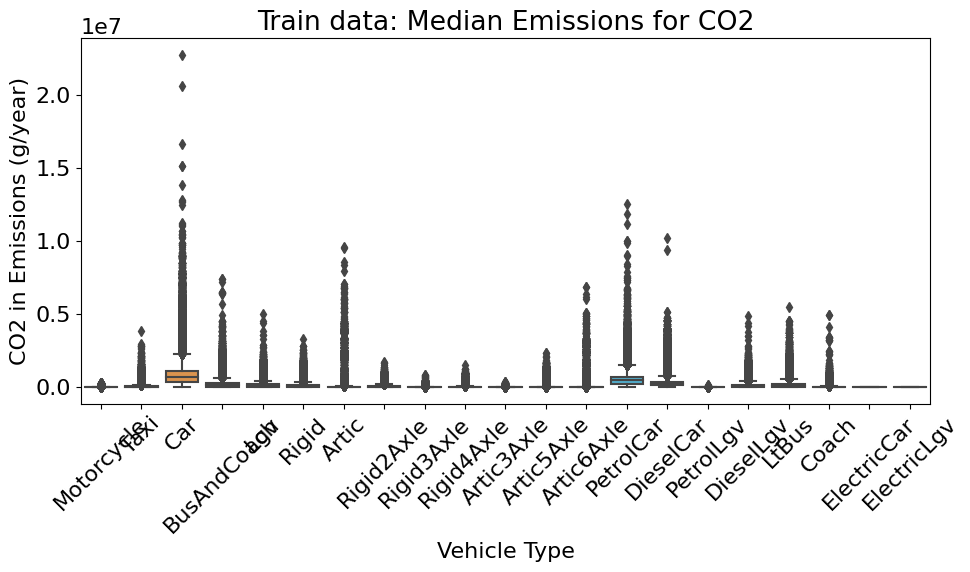

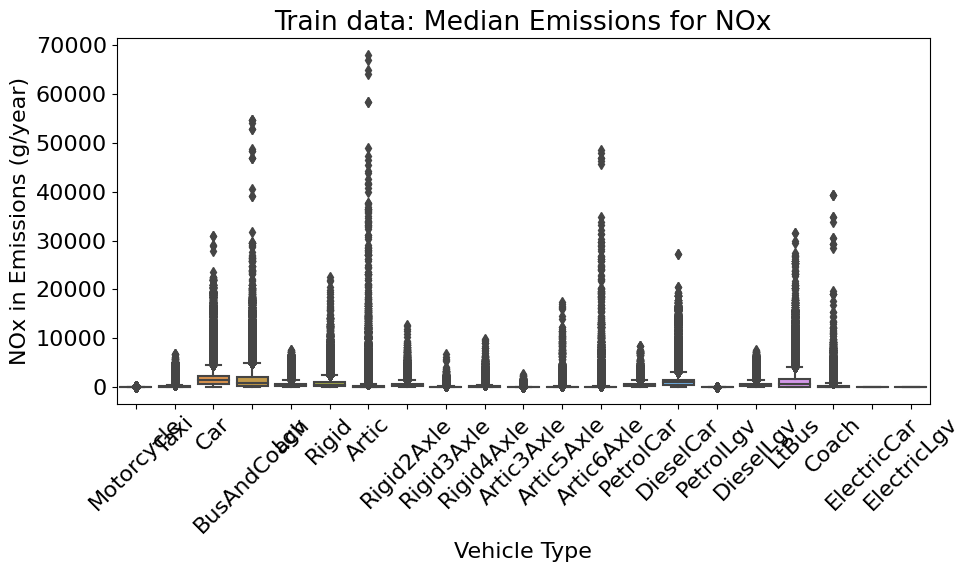

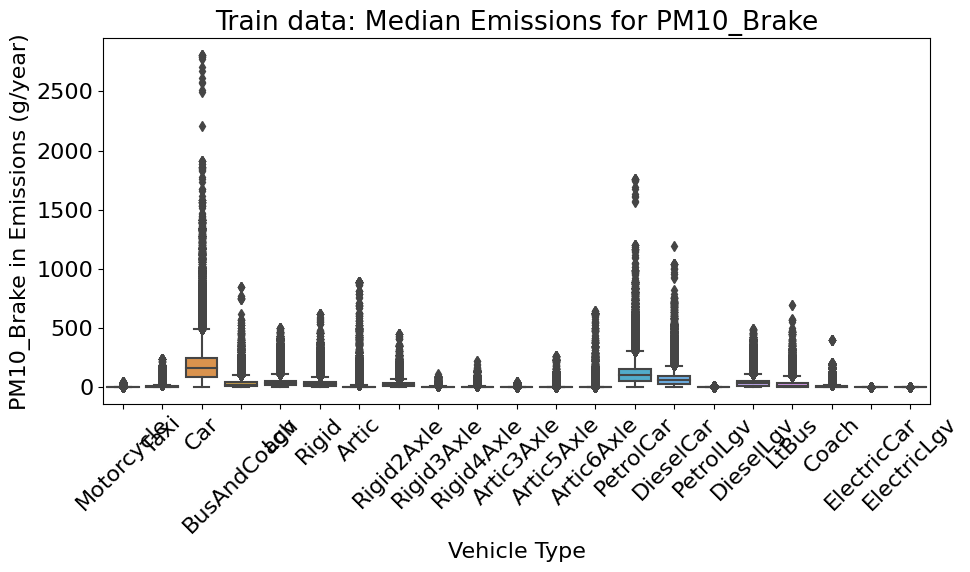

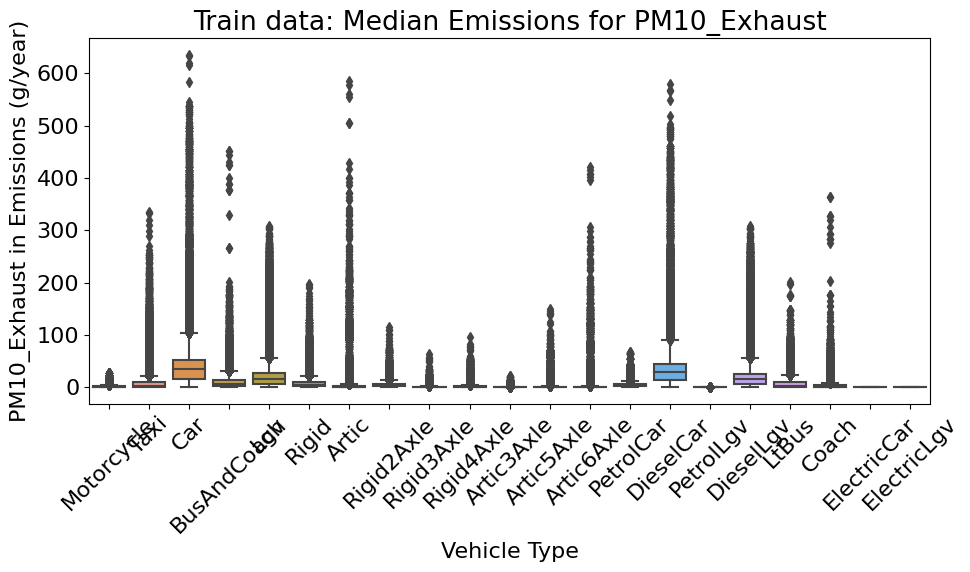

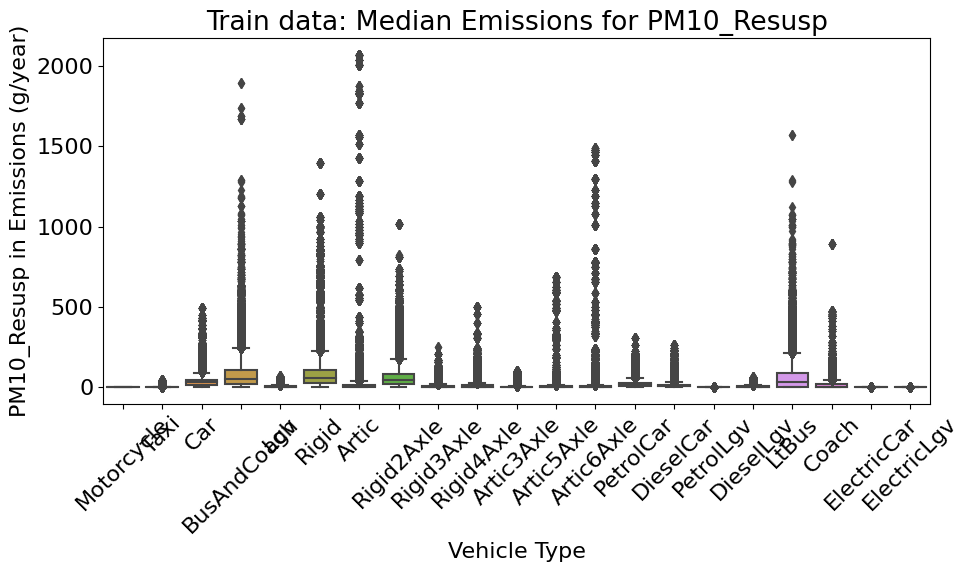

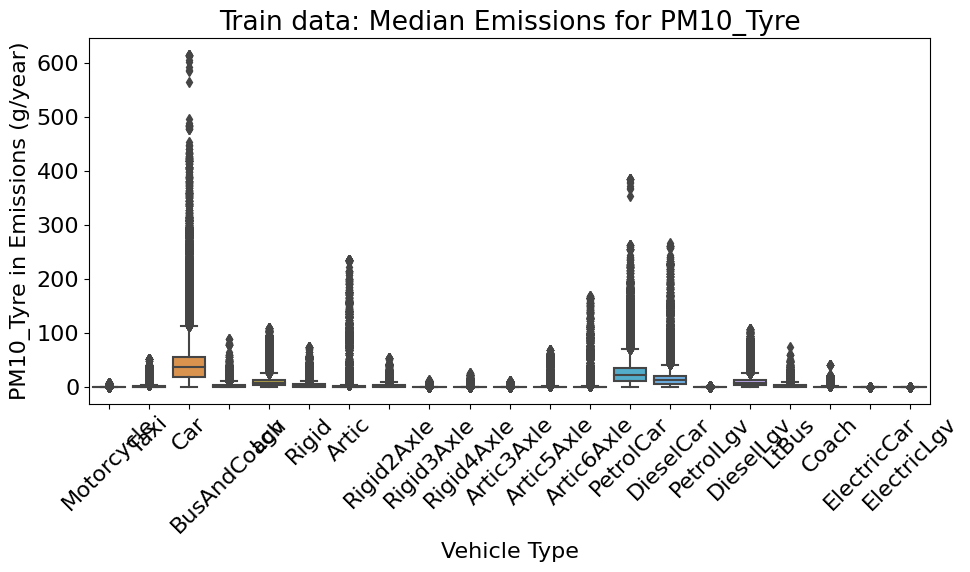

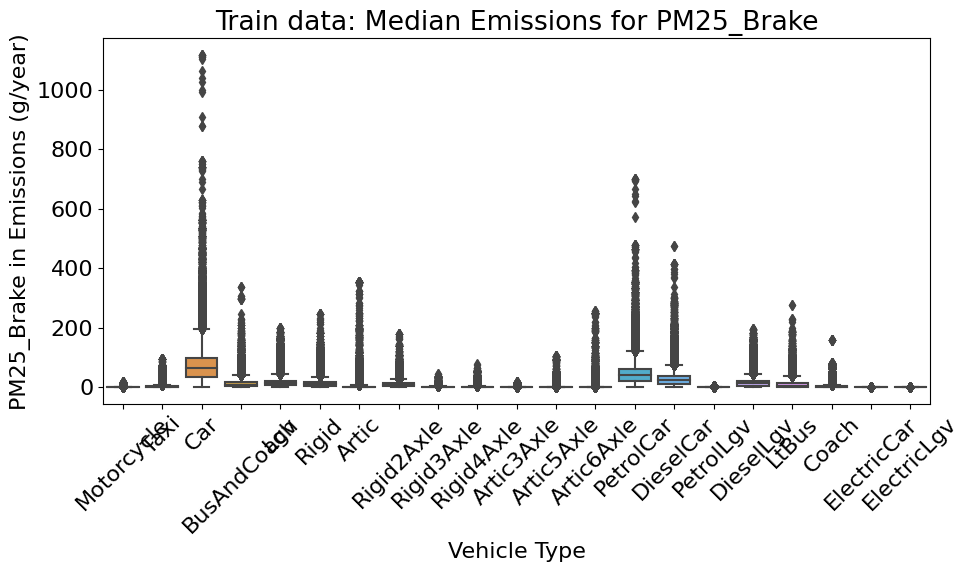

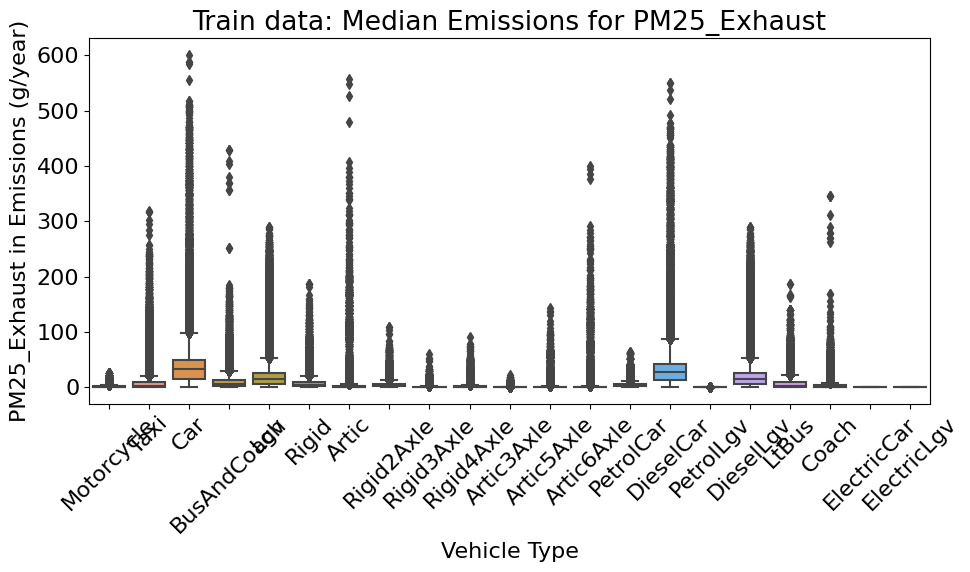

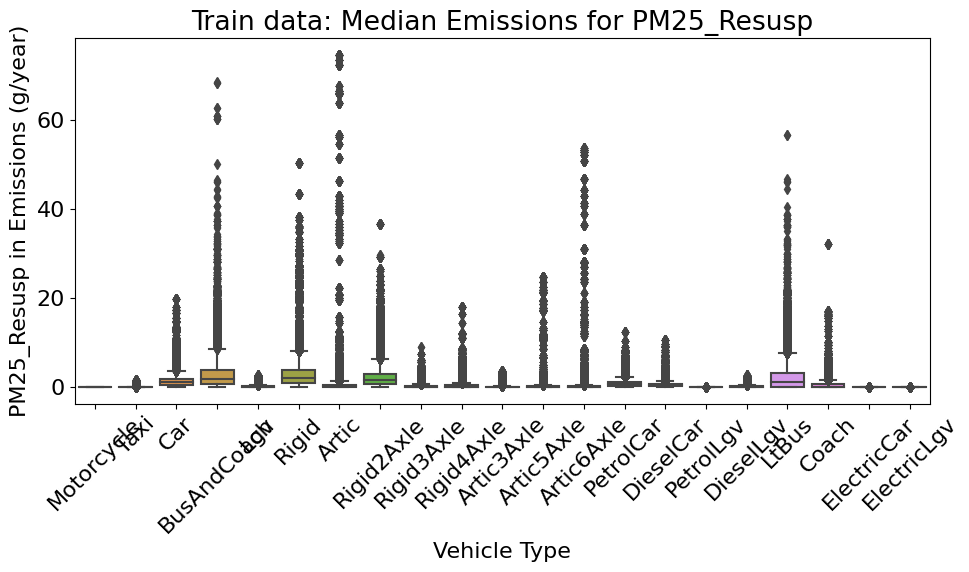

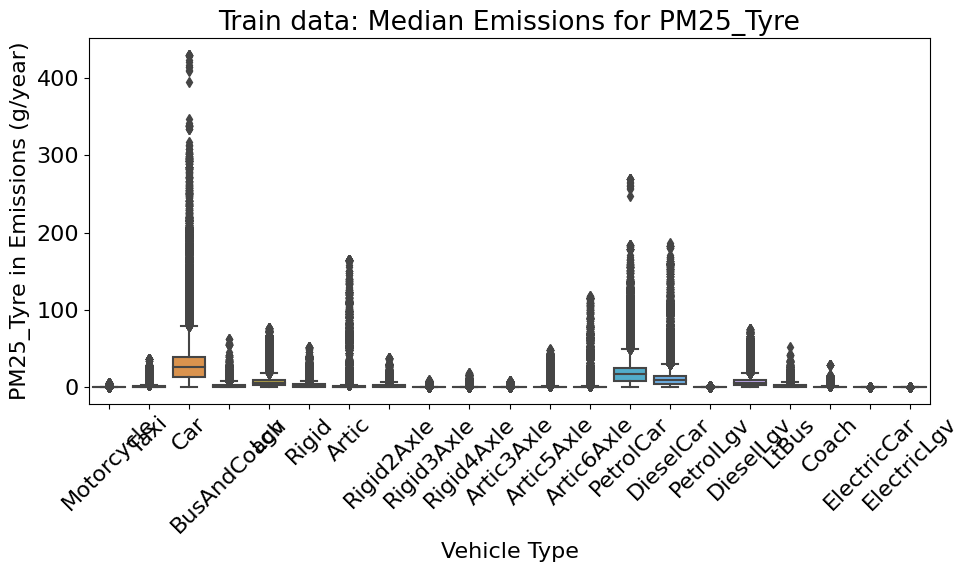

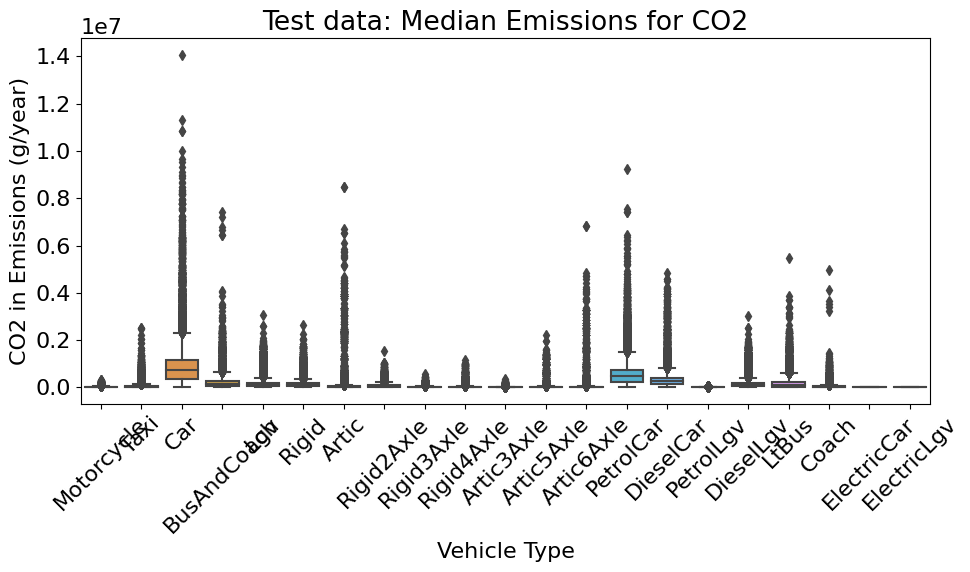

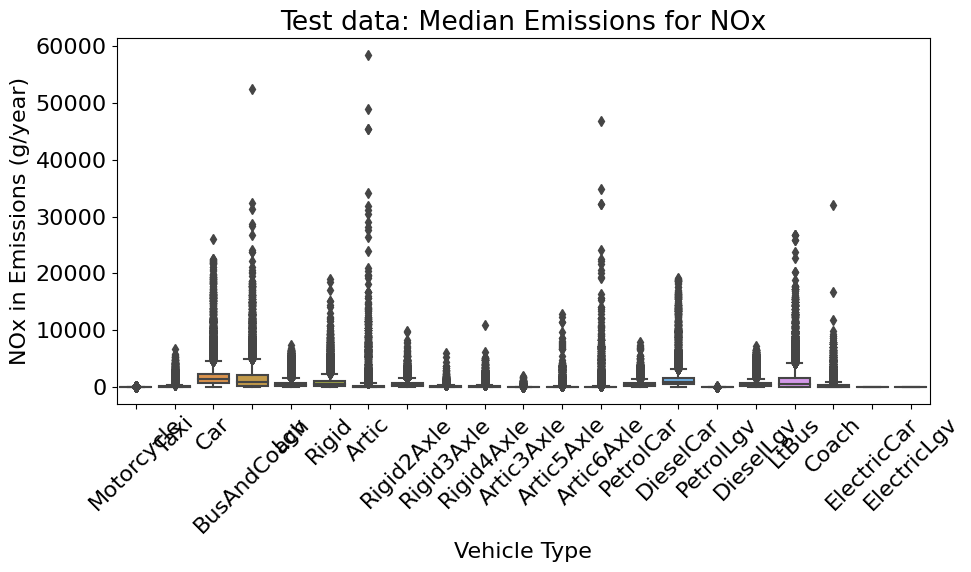

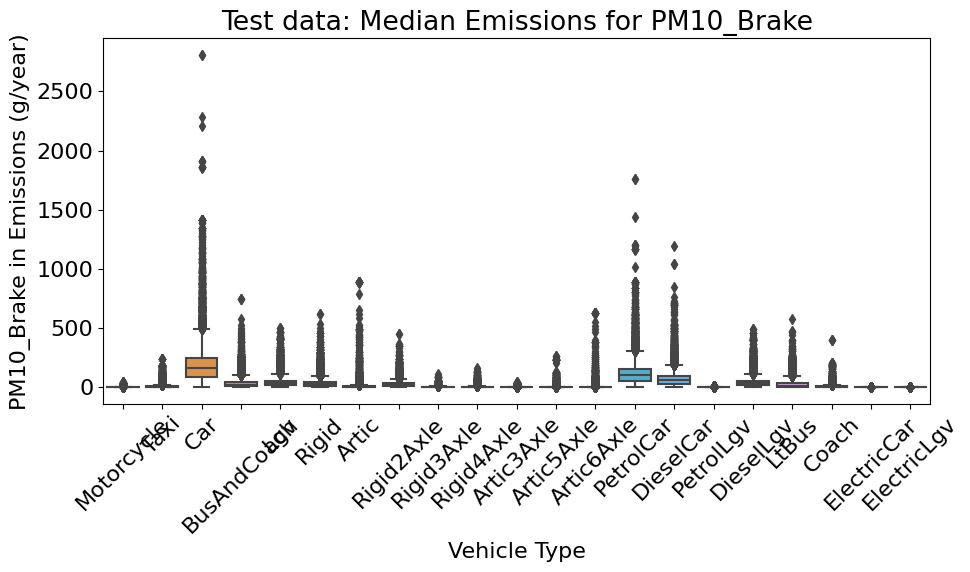

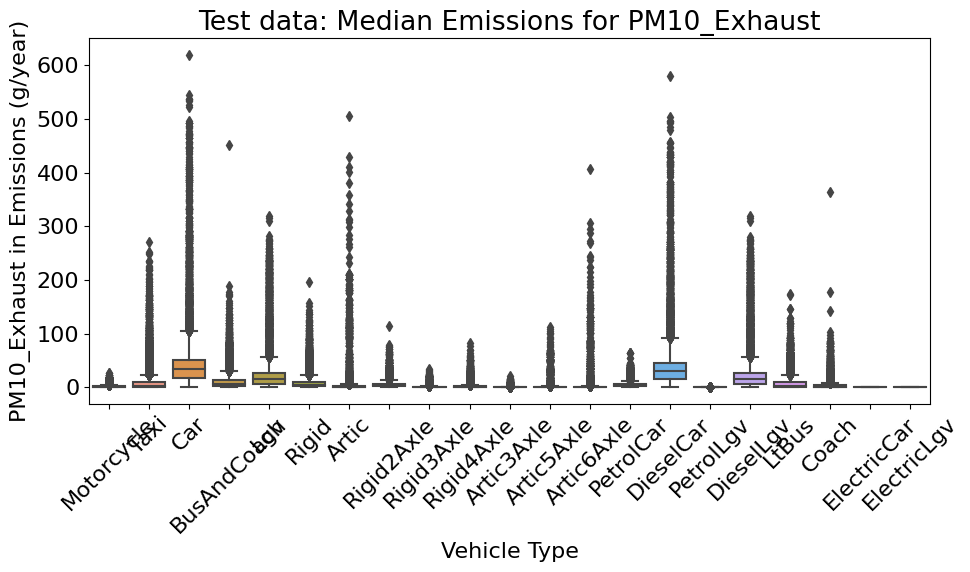

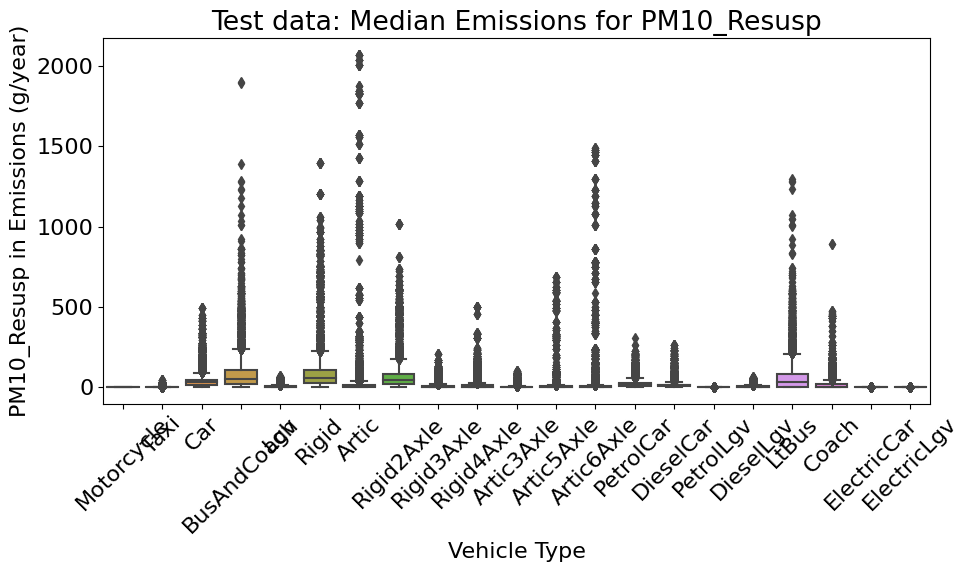

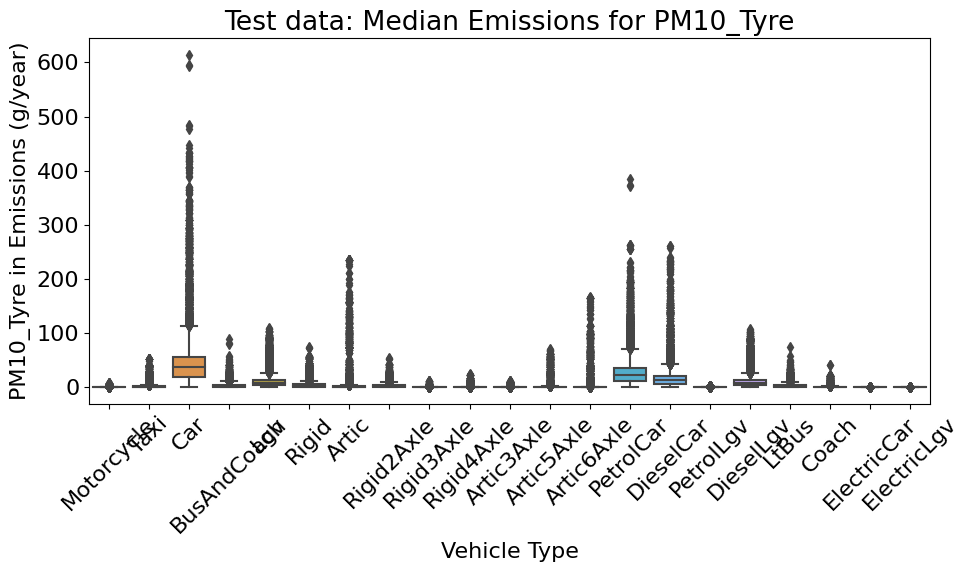

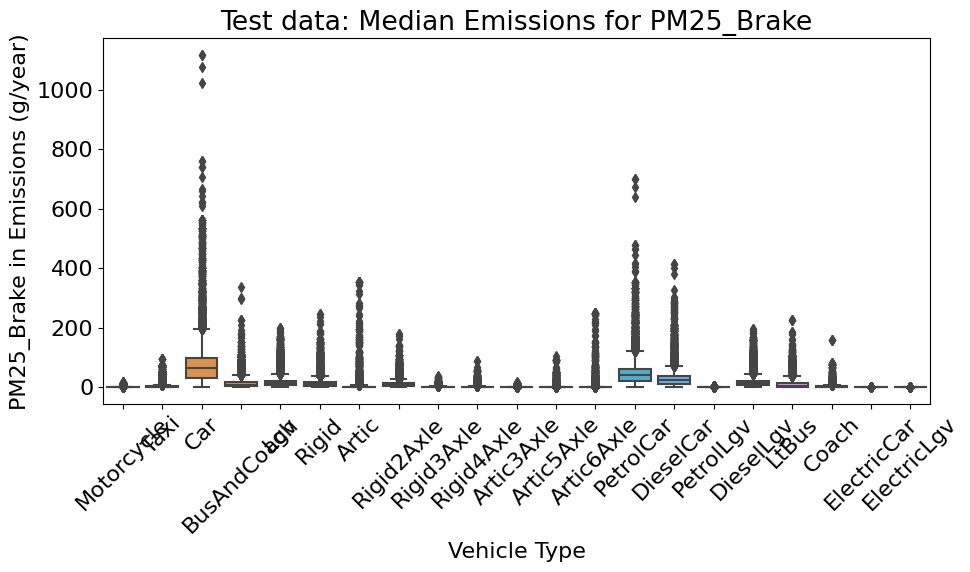

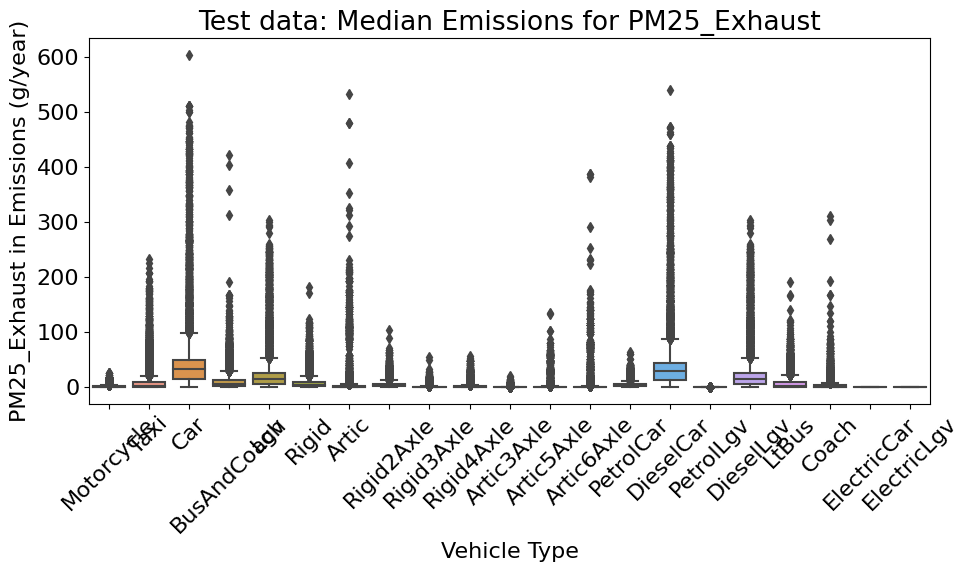

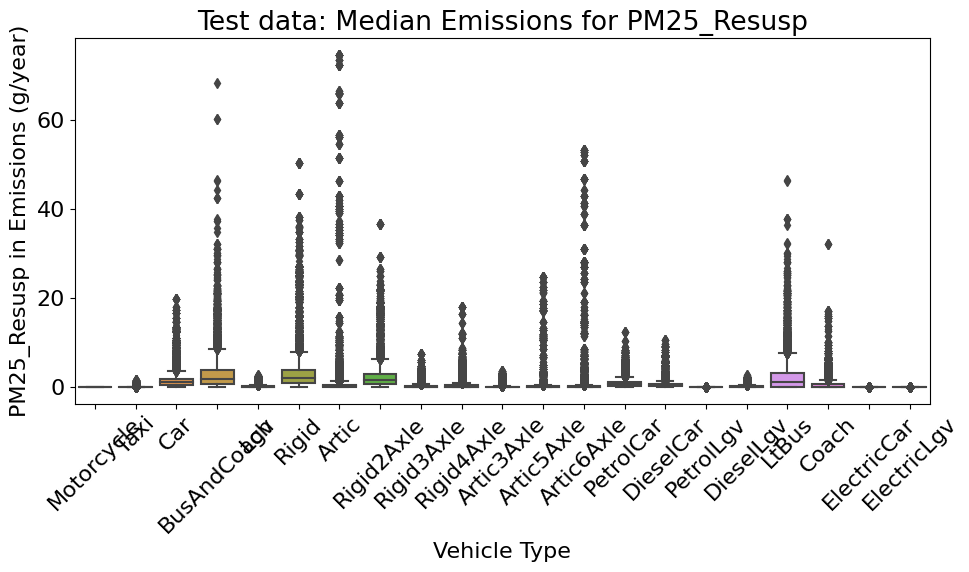

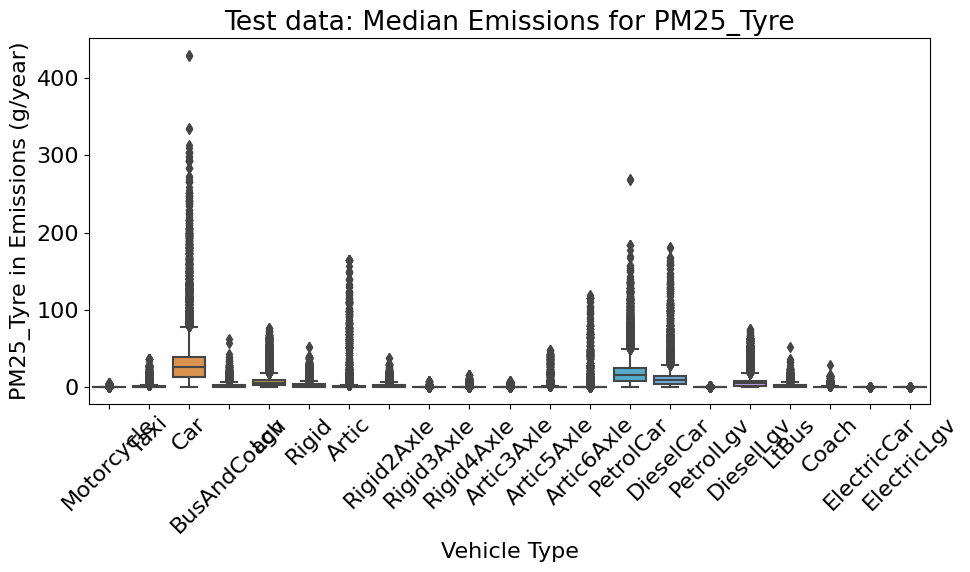

In [270]:
# Explorative Data Analysis

pollutants = df['Pollutant'].unique()

# Iterating over each vehicle type and plotting average emissions for each pollutant

def boxplot_explore(df, title):
    for pollutant in pollutants:
        df_filtered = df[df['Pollutant'] == pollutant]
        plt.figure(figsize=(10,6))
        sns.boxplot(data=df_filtered.iloc[:, 2:])
        plt.title(f'{title}: Median Emissions for {pollutant}')
        plt.xlabel('Vehicle Type')  
        plt.xticks(rotation=45)
        plt.xticks(rotation=45)
        plt.ylabel(f'{pollutant} in Emissions (g/year)')
        plt.tight_layout()
        plt.savefig(f'../data/processed/figures/pre_outlier_removal_emissions_{pollutant}.png')
        plt.show()

boxplot_explore(df_train,'Train data')
boxplot_explore(df_test,'Test data')

In [271]:
# Creating a dictionary to store the median values of each pollutant for each vehicle type

vehicles = ['Motorcycle', 'Taxi', 'Car', 'BusAndCoach', 'Lgv', 'Rigid', 'Artic',
                   'Rigid2Axle', 'Rigid3Axle', 'Rigid4Axle', 'Artic3Axle', 'Artic5Axle',
                   'Artic6Axle', 'PetrolCar', 'DieselCar', 'PetrolLgv', 'DieselLgv',
                   'LtBus', 'Coach', 'ElectricCar', 'ElectricLgv']

pollutants = ['CO2', 'NOx', 'PM10_Brake', 'PM10_Exhaust', 'PM10_Resusp',
       'PM10_Tyre', 'PM25_Brake', 'PM25_Exhaust', 'PM25_Resusp',
       'PM25_Tyre']



def replacing_zeroes_with_median(df, pollutants, vehicles):
    medians_dict= {'Pollutant': [], 'Vehicle': [], 'BeforeIQR': []}
    for pollutant in pollutants:
        df_filtered = df[df['Pollutant'] == pollutant]
        for vehicle in vehicles:
            df_vehicle = df_filtered[vehicle]
            #selecting only the rows where the value is greater than 0
            bool_non_zero_fil = df_vehicle > 0
            #calculating the median of the filtered rows
            median_value = df_vehicle[bool_non_zero_fil].median()
               
            #median_val = df_filtered[vehicle].median()
            medians_dict['Pollutant'].append(pollutant)
            medians_dict['Vehicle'].append(vehicle)
            #medians_dict['BeforeIQR'].append(median_val)
            medians_dict['BeforeIQR'].append(median_value)
            
    return medians_dict
            
            
median_train_before=replacing_zeroes_with_median(df_train,pollutants,vehicles)
median_test_before=replacing_zeroes_with_median(df_test,pollutants,vehicles)

In [272]:
median_train_before_df = pd.DataFrame(median_train_before)
median_test_before_df = pd.DataFrame(median_test_before)

Median imputation

In [273]:
# Filling in MVNAR values with the median of the pollutant and vehicle type

vehicles = ['Motorcycle', 'Taxi', 'Car', 'BusAndCoach', 'Lgv', 'Rigid', 'Artic',
                   'Rigid2Axle', 'Rigid3Axle', 'Rigid4Axle', 'Artic3Axle', 'Artic5Axle',
                   'Artic6Axle', 'PetrolCar', 'DieselCar', 'PetrolLgv', 'DieselLgv',
                   'LtBus', 'Coach', 'ElectricCar', 'ElectricLgv']

pollutants = ['CO2', 'NOx', 'PM10_Brake', 'PM10_Exhaust', 'PM10_Resusp',
       'PM10_Tyre', 'PM25_Brake', 'PM25_Exhaust', 'PM25_Resusp',
       'PM25_Tyre']

def replacing_zeroes_with_median(df, pollutants, vehicles):
    for pollutant in pollutants:
        df_filtered = df[df['Pollutant'] == pollutant]
        for vehicle in vehicles:
            if df_filtered[vehicle].sum() != 0:
                df_vehicle = df_filtered[vehicle]
                #selecting only the rows where the value is greater than 0
                bool_non_zero_fil = df_vehicle > 0
                #calculating the median of the filtered rows
                median_value = df_vehicle[bool_non_zero_fil].median()
                #median_value = df_vehicle.median()
               
                # #calculating the IQR
                
                q1 = df_vehicle[bool_non_zero_fil].quantile(0.25)
                q3 = df_vehicle[bool_non_zero_fil].quantile(0.75)
                iqr = q3 - q1
                lower_bound = q1 - (1.5 * iqr)
                upper_bound = q3 + (1.5 * iqr)
                outliers = (df_vehicle < lower_bound) | (df_vehicle > upper_bound)
                mask = (df['Pollutant'] == pollutant) & outliers
                df.loc[mask, vehicle] = median_value
                
                
                
                
                fil=(df['Pollutant']==pollutant) & (df[vehicle]==0)
                df.loc[fil, vehicle] = median_value
                
    return df
           
df_train = replacing_zeroes_with_median(df_train, pollutants, vehicles)
df_test = replacing_zeroes_with_median(df_test, pollutants, vehicles)

In [274]:
print(df_train.shape , df_test.shape)

(681728, 23) (170432, 23)


In [275]:
print(df_train.isna().sum() , df_test.isna().sum() )

GridId         0
Pollutant      0
Motorcycle     0
Taxi           0
Car            0
BusAndCoach    0
Lgv            0
Rigid          0
Artic          0
Rigid2Axle     0
Rigid3Axle     0
Rigid4Axle     0
Artic3Axle     0
Artic5Axle     0
Artic6Axle     0
PetrolCar      0
DieselCar      0
PetrolLgv      0
DieselLgv      0
LtBus          0
Coach          0
ElectricCar    0
ElectricLgv    0
dtype: int64 GridId         0
Pollutant      0
Motorcycle     0
Taxi           0
Car            0
BusAndCoach    0
Lgv            0
Rigid          0
Artic          0
Rigid2Axle     0
Rigid3Axle     0
Rigid4Axle     0
Artic3Axle     0
Artic5Axle     0
Artic6Axle     0
PetrolCar      0
DieselCar      0
PetrolLgv      0
DieselLgv      0
LtBus          0
Coach          0
ElectricCar    0
ElectricLgv    0
dtype: int64


Explorative Data Analysis post cleaning

In [276]:
# Explorative Data Analysis to check the impact of the outlier removal: what is the impact on the median values of the emissions?

vehicles = ['Motorcycle', 'Taxi', 'Car', 'BusAndCoach', 'Lgv', 'Rigid', 'Artic',
                   'Rigid2Axle', 'Rigid3Axle', 'Rigid4Axle', 'Artic3Axle', 'Artic5Axle',
                   'Artic6Axle', 'PetrolCar', 'DieselCar', 'PetrolLgv', 'DieselLgv',
                   'LtBus', 'Coach', 'ElectricCar', 'ElectricLgv']

pollutants = ['CO2', 'NOx', 'PM10_Brake', 'PM10_Exhaust', 'PM10_Resusp',
       'PM10_Tyre', 'PM25_Brake', 'PM25_Exhaust', 'PM25_Resusp',
       'PM25_Tyre']



def replacing_zeroes_with_median(df, pollutants, vehicles):
    medians_dict = {'Pollutant': [], 'Vehicle': [], 'AfterIQR': []}
    for pollutant in pollutants:
        df_filtered = df[df['Pollutant'] == pollutant]
        for vehicle in vehicles:
            median_val = df_filtered[vehicle].median()
            medians_dict['Pollutant'].append(pollutant)
            medians_dict['Vehicle'].append(vehicle)
            medians_dict['AfterIQR'].append(median_val)
            
    return medians_dict
            
            
median_train_after=replacing_zeroes_with_median(df_train,pollutants,vehicles)
median_test_after=replacing_zeroes_with_median(df_test,pollutants,vehicles)


train_medians_df_beforeIQR = pd.DataFrame(median_train_before)
test_medians_df_beforeIQR = pd.DataFrame(median_test_before)

train_medians_df_afterIQR = pd.DataFrame(median_train_after)
test_medians_df_afterIQR = pd.DataFrame(median_test_after)

train_medians_df = train_medians_df_beforeIQR.merge(train_medians_df_afterIQR, on=['Pollutant', 'Vehicle'], how='inner')
test_medians_df = test_medians_df_beforeIQR.merge(test_medians_df_afterIQR, on=['Pollutant', 'Vehicle'], how='inner')

train_medians_df['PrecentageDiff']= abs((train_medians_df['AfterIQR']-train_medians_df['BeforeIQR'])/train_medians_df['BeforeIQR']*100)
test_medians_df['PrecentageDiff']= abs((test_medians_df['AfterIQR']-test_medians_df['BeforeIQR'])/test_medians_df['BeforeIQR']*100)


In [277]:
train_medians_df.nlargest(5,'PrecentageDiff')

Pollutant      Vehicle      BeforeIQR       AfterIQR  PrecentageDiff
0       CO2   Motorcycle    8477.905388    8477.905388             0.0
1       CO2         Taxi   16388.160630   16388.160630             0.0
2       CO2          Car  745732.740331  745732.740331             0.0
3       CO2  BusAndCoach  156883.472708  156883.472708             0.0
4       CO2          Lgv  115262.786552  115262.786552             0.0

In [278]:
train_medians_df.nsmallest(5,'PrecentageDiff')

Pollutant      Vehicle      BeforeIQR       AfterIQR  PrecentageDiff
0       CO2   Motorcycle    8477.905388    8477.905388             0.0
1       CO2         Taxi   16388.160630   16388.160630             0.0
2       CO2          Car  745732.740331  745732.740331             0.0
3       CO2  BusAndCoach  156883.472708  156883.472708             0.0
4       CO2          Lgv  115262.786552  115262.786552             0.0

In [279]:
test_medians_df.nlargest(5,'PrecentageDiff')

Pollutant      Vehicle      BeforeIQR       AfterIQR  PrecentageDiff
0       CO2   Motorcycle    8452.893880    8452.893880             0.0
1       CO2         Taxi   16508.211039   16508.211039             0.0
2       CO2          Car  746745.987303  746745.987303             0.0
3       CO2  BusAndCoach  156368.437388  156368.437388             0.0
4       CO2          Lgv  115966.272890  115966.272890             0.0

In [280]:
test_medians_df.nsmallest(5,'PrecentageDiff')

Pollutant      Vehicle      BeforeIQR       AfterIQR  PrecentageDiff
0       CO2   Motorcycle    8452.893880    8452.893880             0.0
1       CO2         Taxi   16508.211039   16508.211039             0.0
2       CO2          Car  746745.987303  746745.987303             0.0
3       CO2  BusAndCoach  156368.437388  156368.437388             0.0
4       CO2          Lgv  115966.272890  115966.272890             0.0

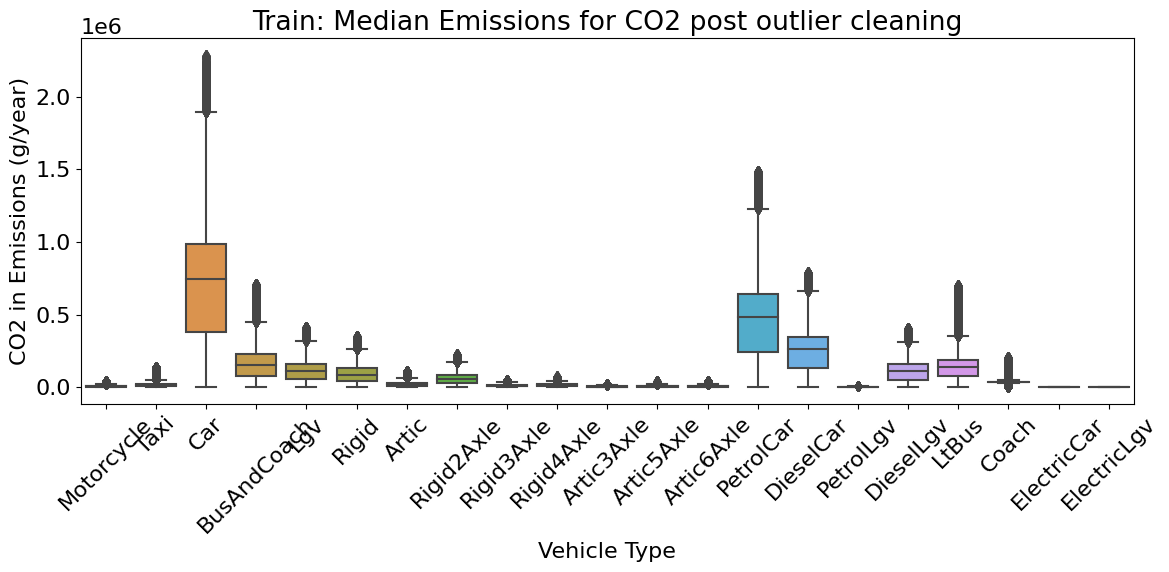

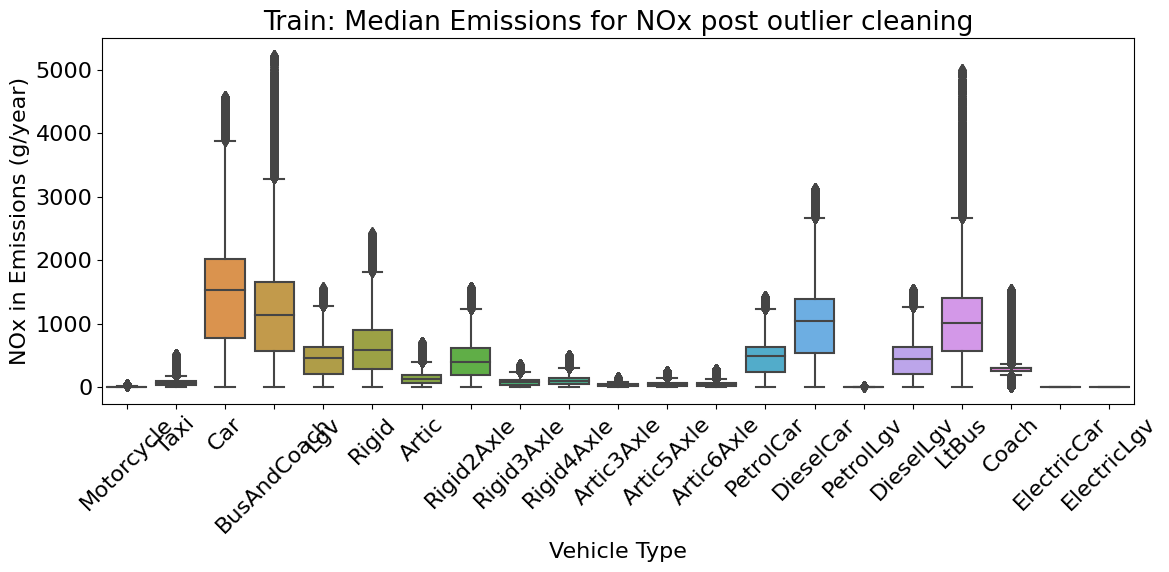

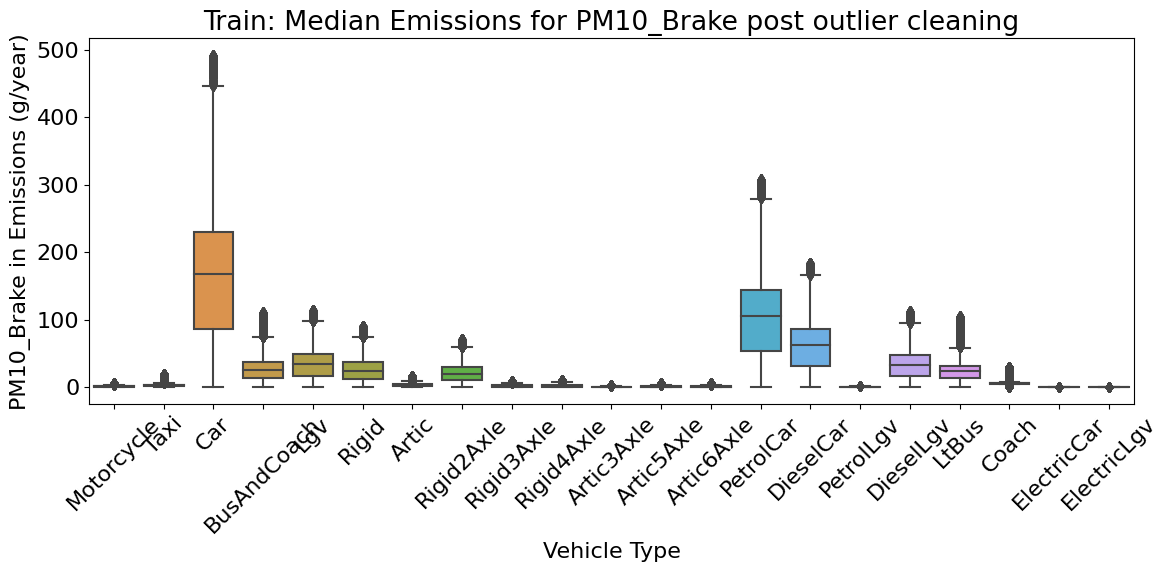

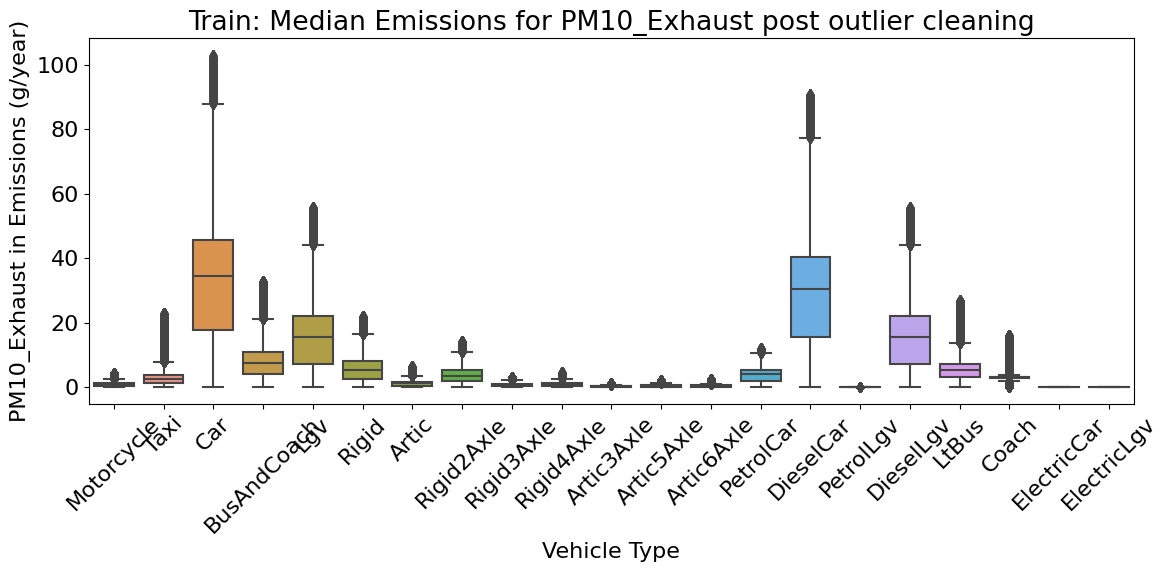

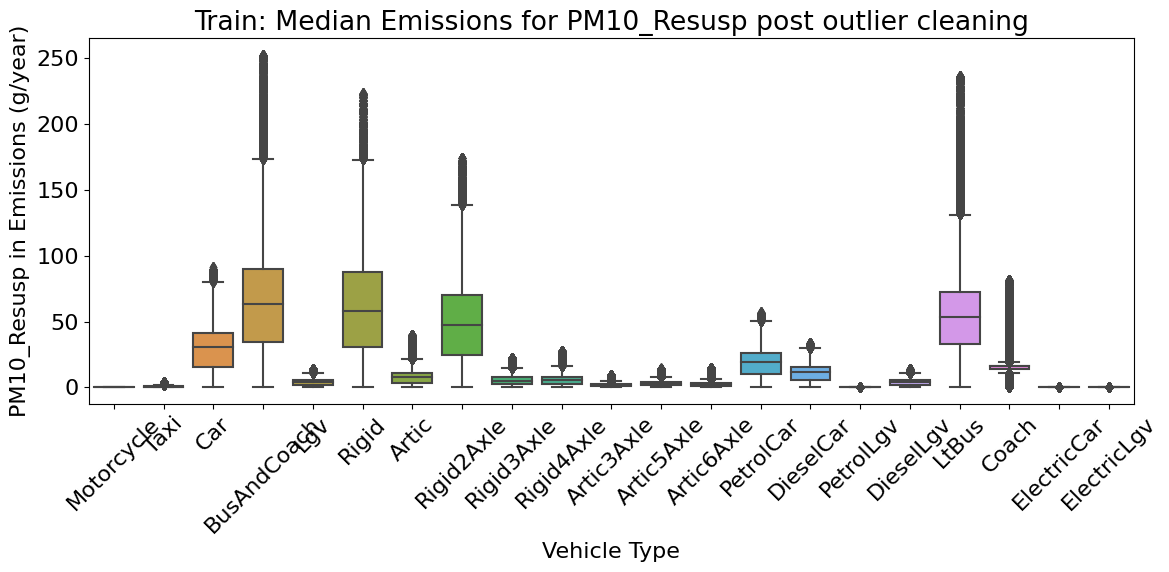

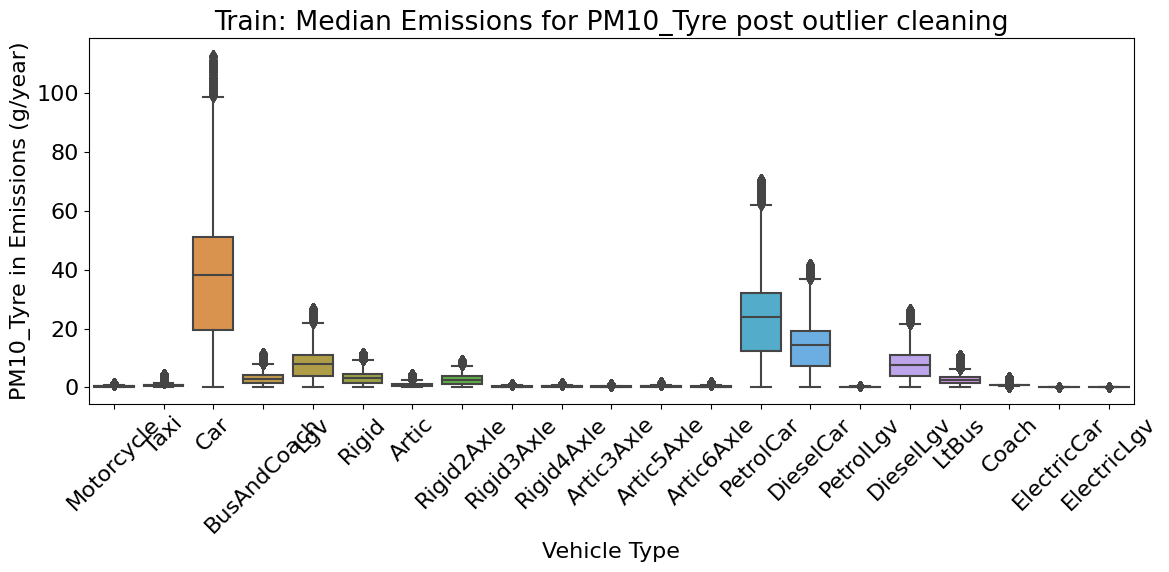

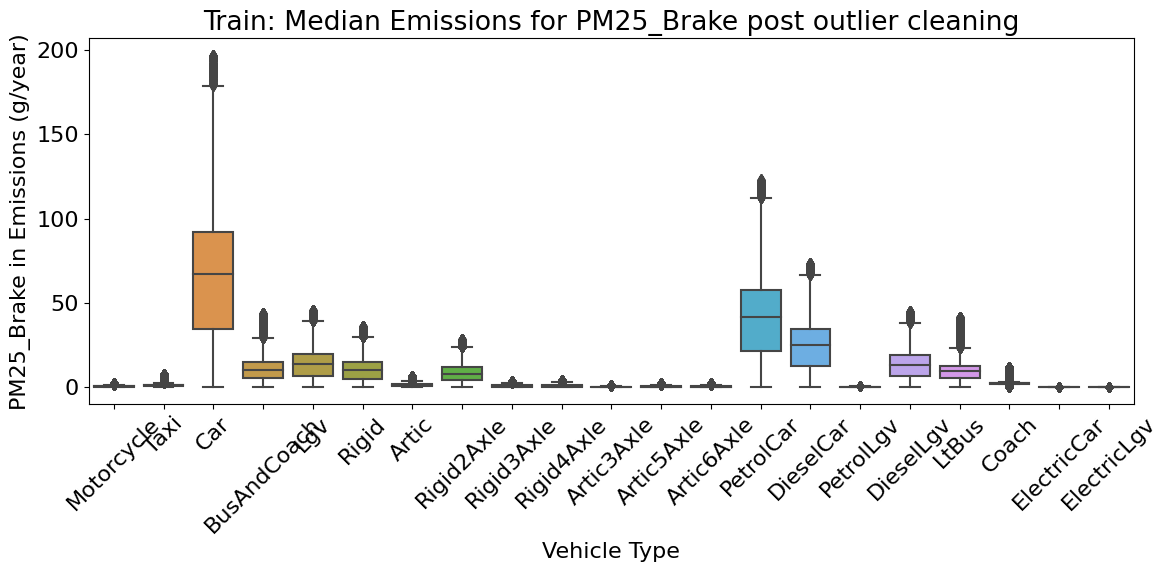

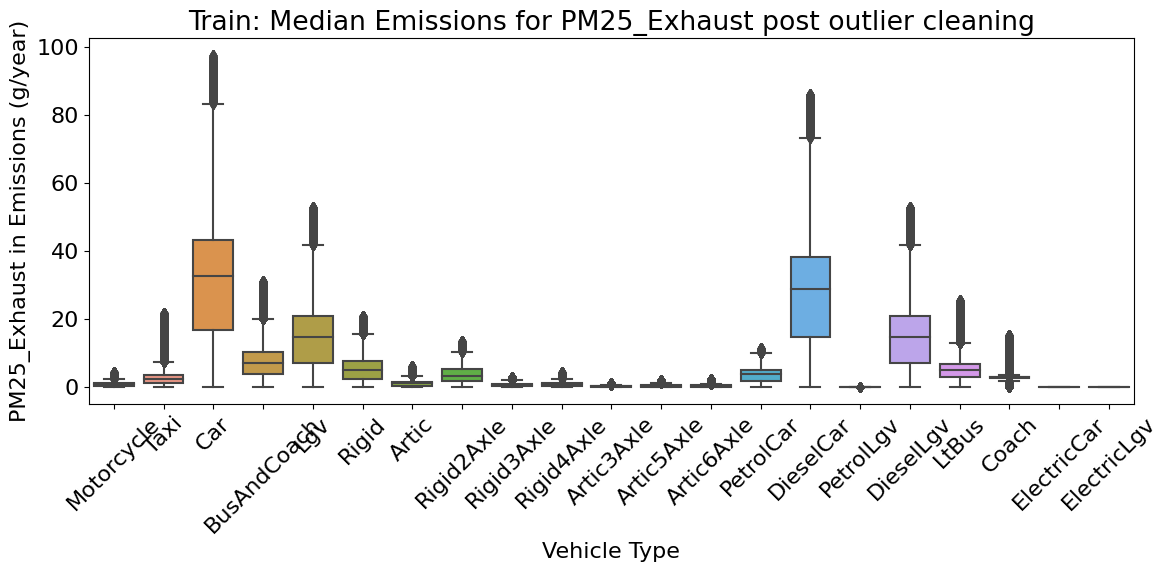

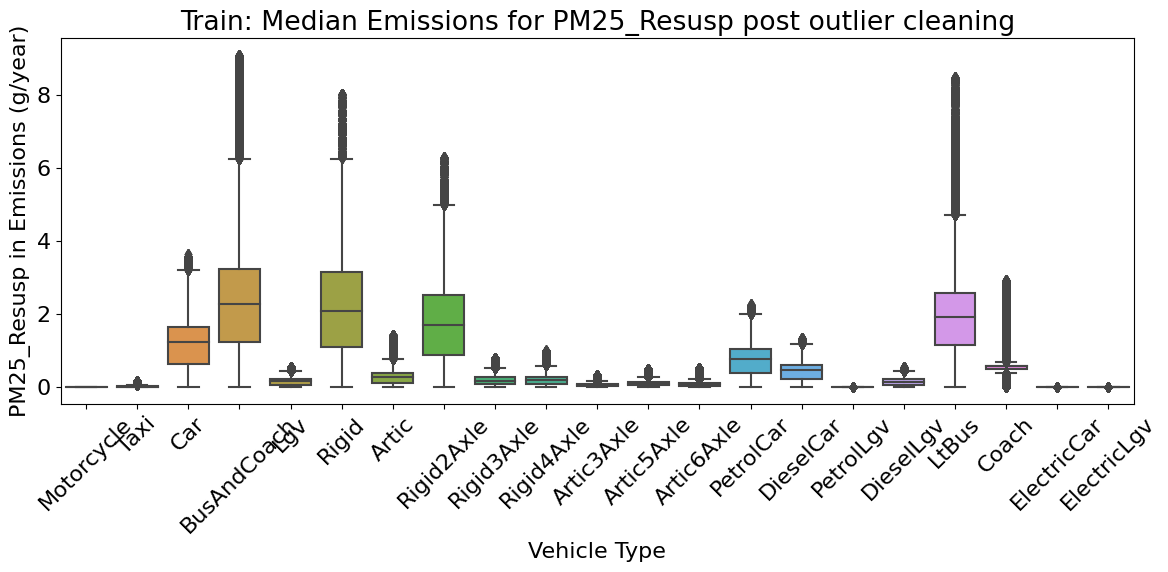

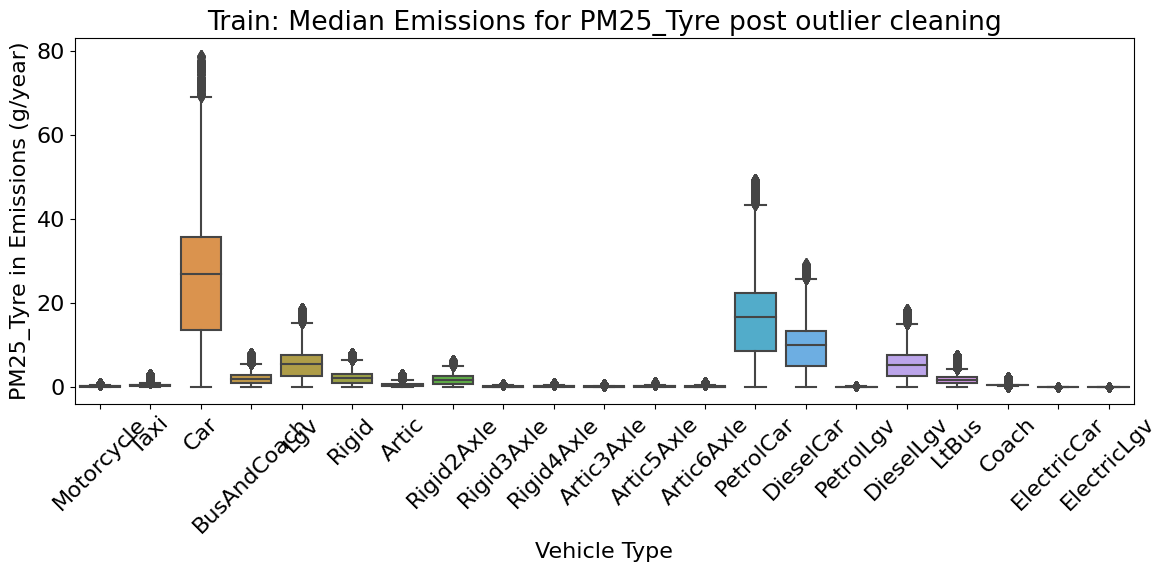

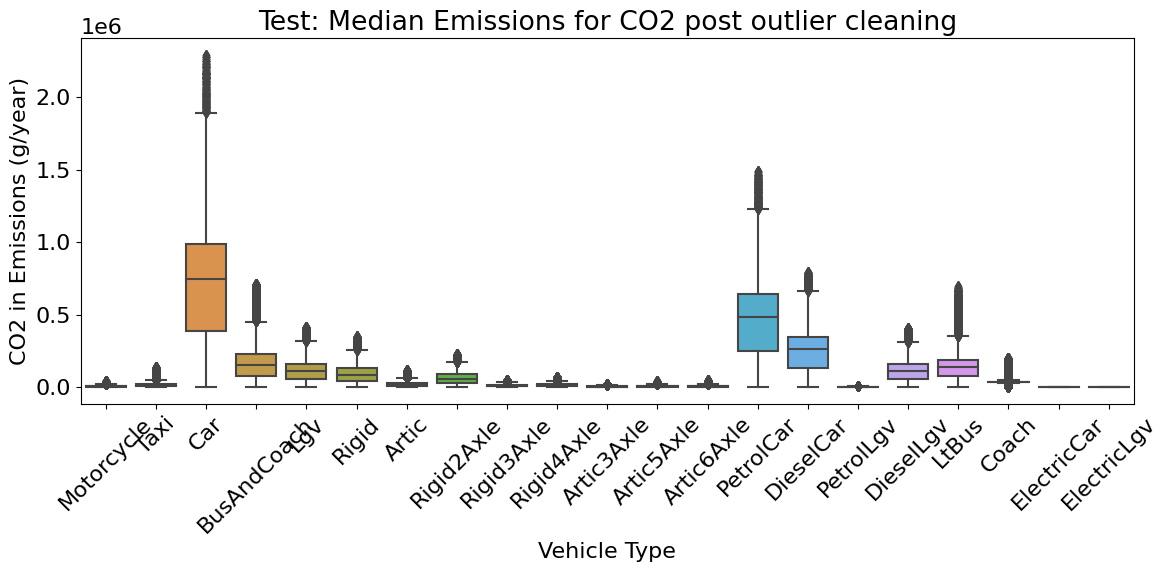

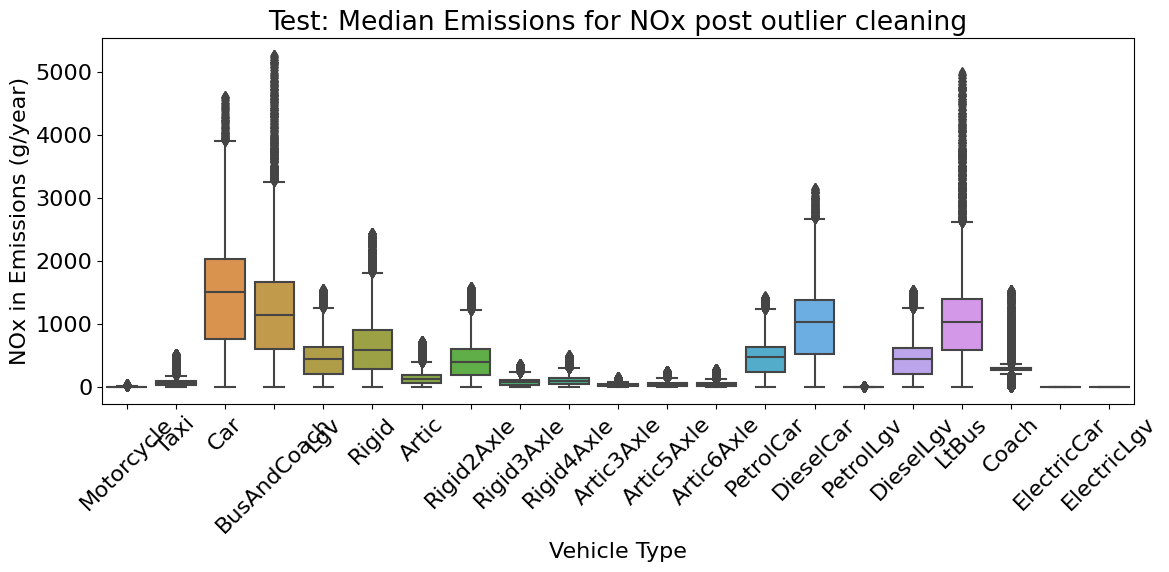

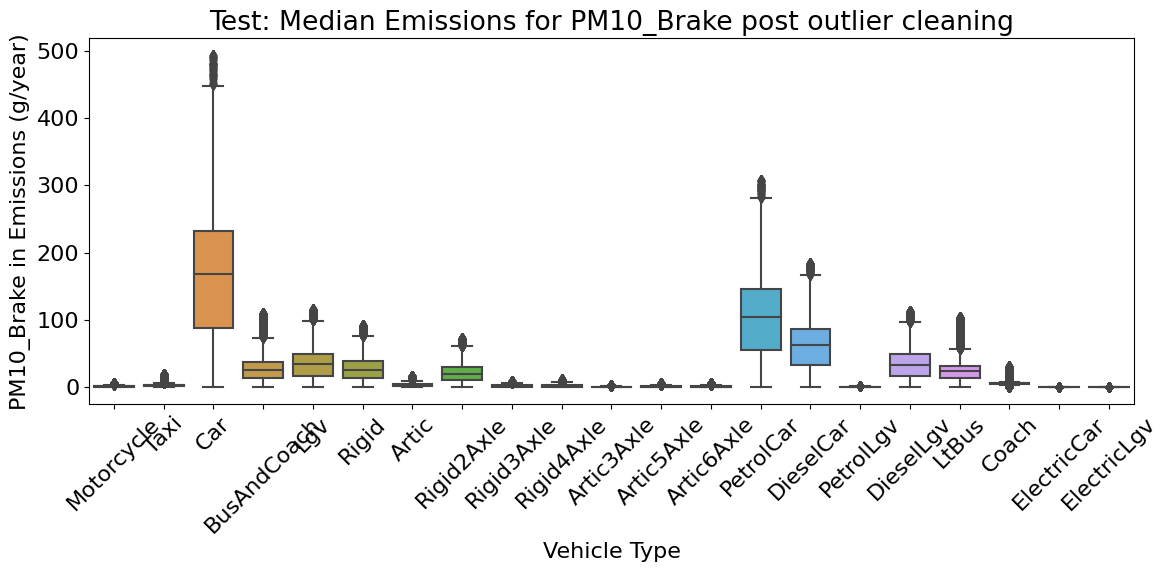

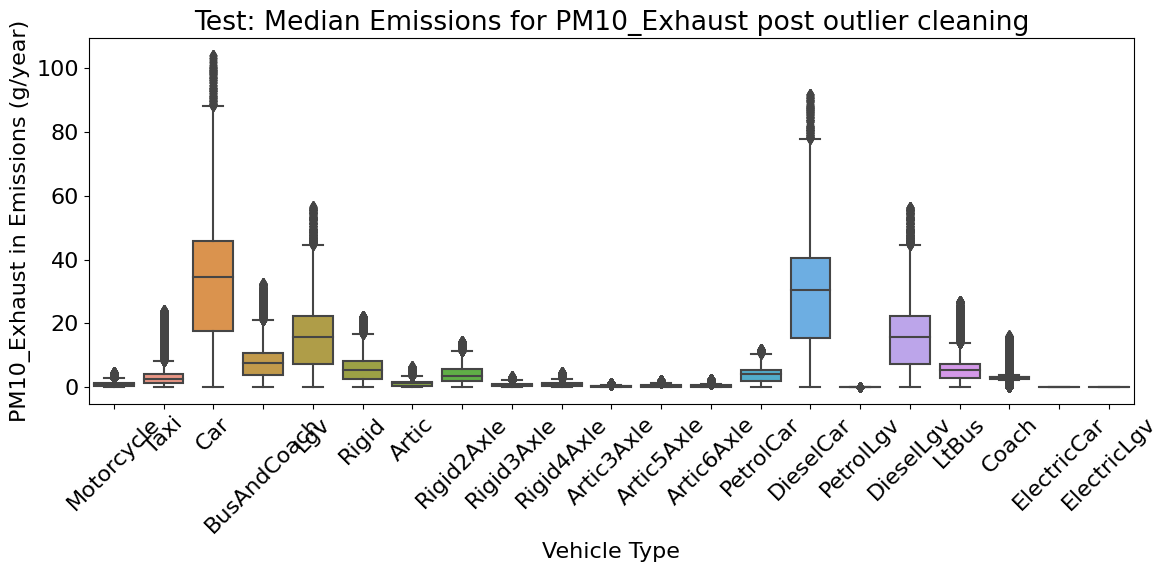

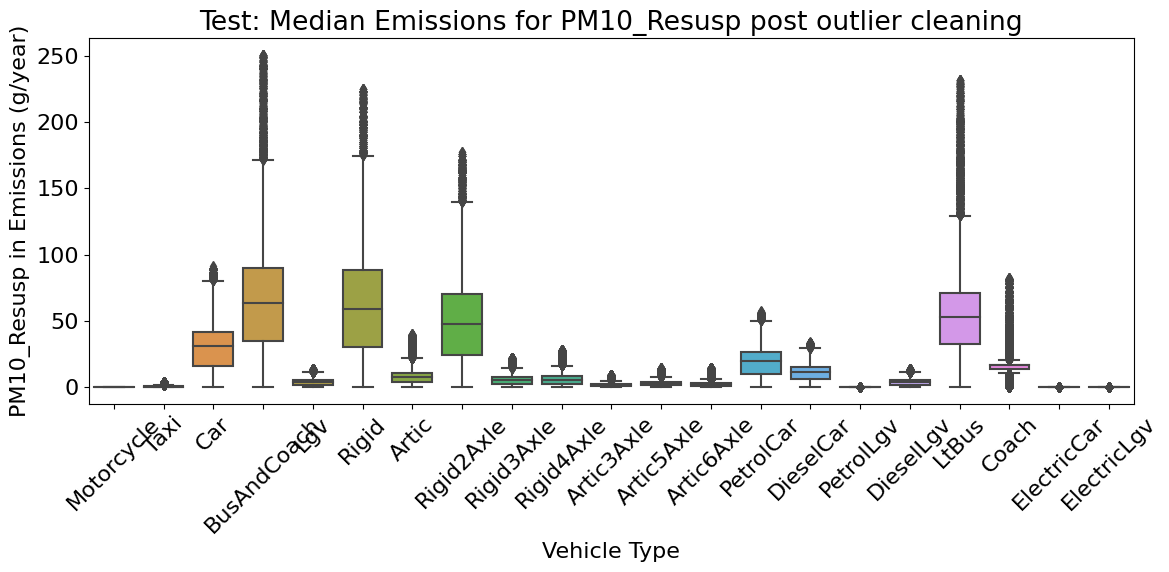

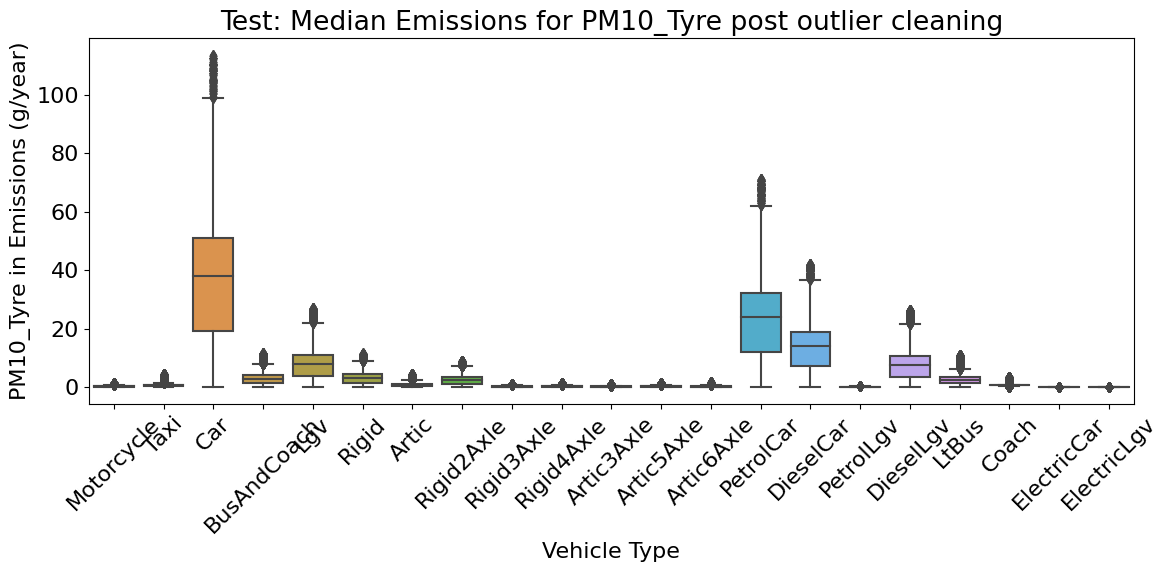

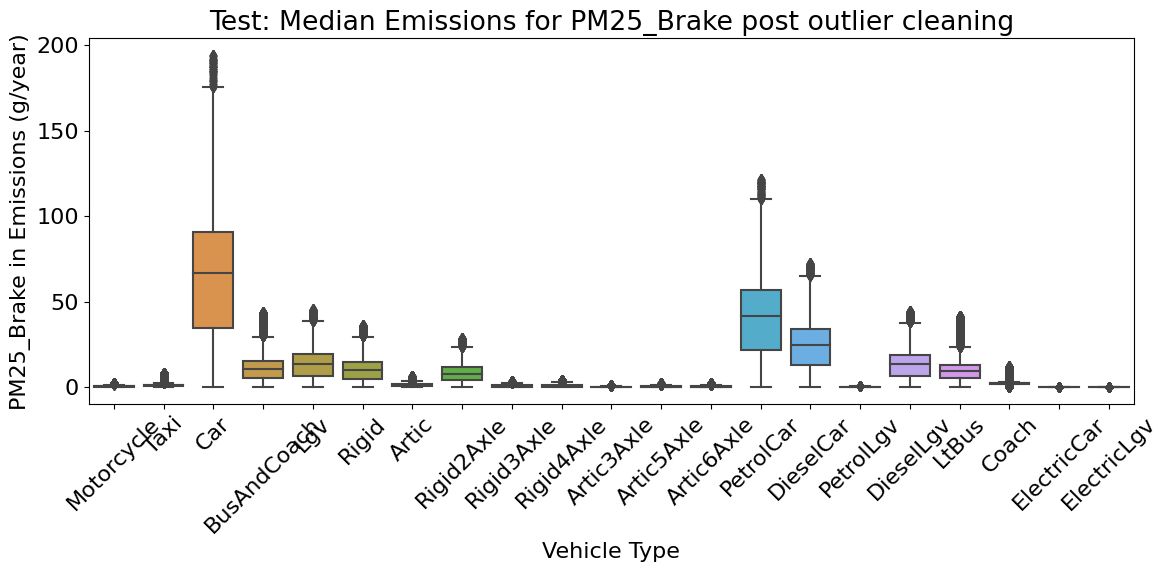

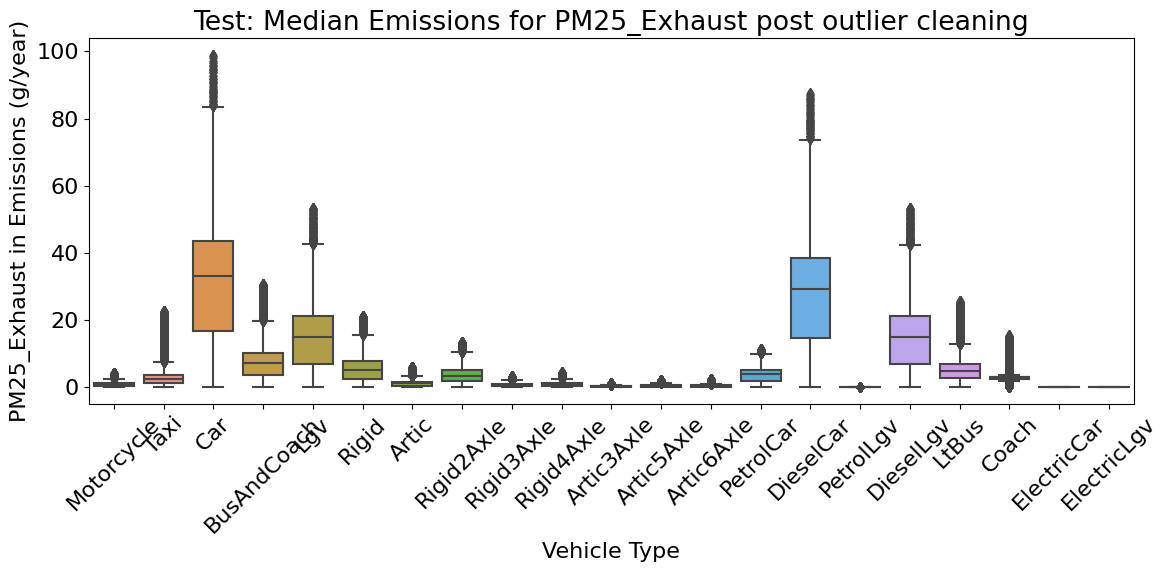

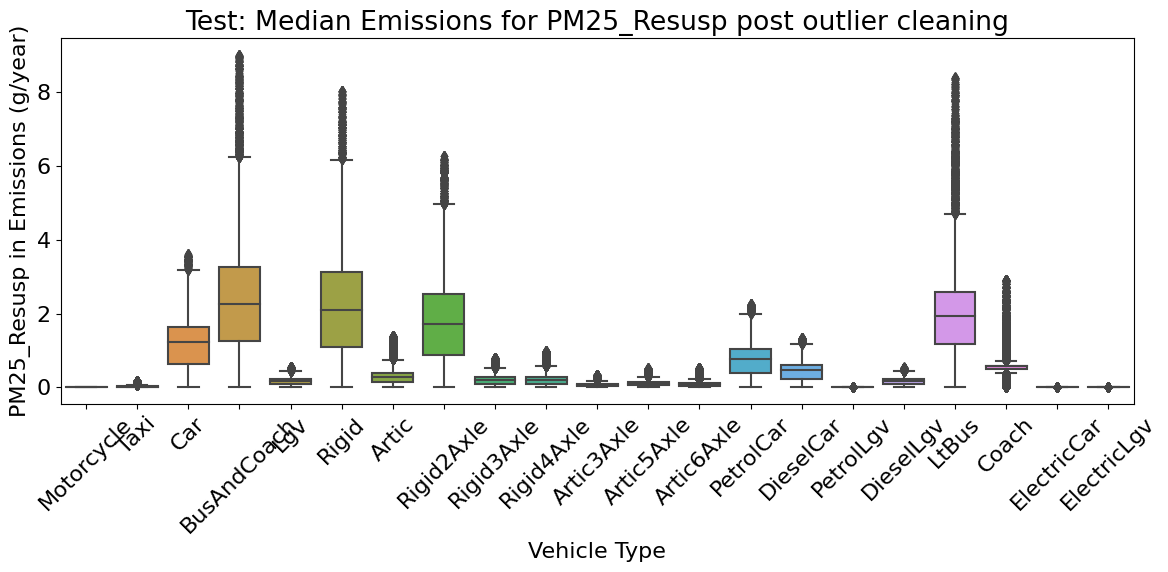

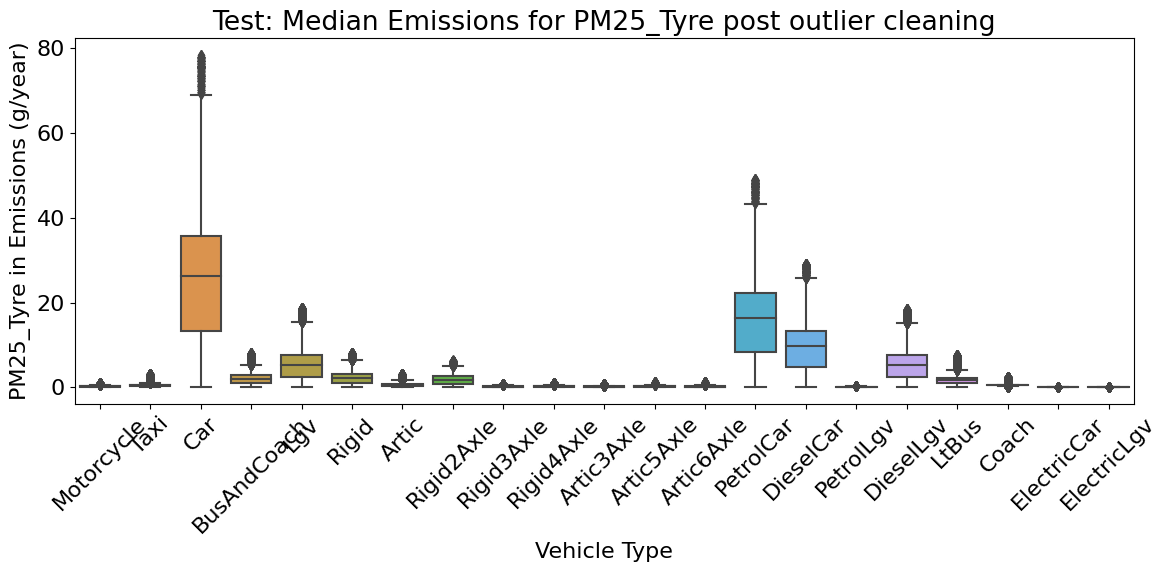

In [281]:
pollutants = df['Pollutant'].unique()

# Iterating over each vehicle type and plotting average emissions for each pollutant

def boxplot_post_clean(df, title):
    for pollutant in pollutants:
        df_filtered = df[df['Pollutant'] == pollutant]
        plt.figure(figsize=(12,6))
        sns.boxplot(data=df_filtered.iloc[:, 2:])
        plt.title(f'{title}: Median Emissions for {pollutant} post outlier cleaning')
        plt.xlabel('Vehicle Type')  
        plt.xticks(rotation=45)
        plt.xticks(rotation=45)
        plt.ylabel(f'{pollutant} in Emissions (g/year)')
        plt.tight_layout()
        #plt.savefig(f'../data/processed/figures/after_median_0s_removed_emissions_{pollutant}.png')
        plt.show()
    
boxplot_post_clean(df_train,'Train')
boxplot_post_clean(df_test,'Test')

In [282]:
print(df_train.shape, df_test.shape)

(681728, 23) (170432, 23)


In [283]:
df_train.isna().sum()

GridId         0
Pollutant      0
Motorcycle     0
Taxi           0
Car            0
BusAndCoach    0
Lgv            0
Rigid          0
Artic          0
Rigid2Axle     0
Rigid3Axle     0
Rigid4Axle     0
Artic3Axle     0
Artic5Axle     0
Artic6Axle     0
PetrolCar      0
DieselCar      0
PetrolLgv      0
DieselLgv      0
LtBus          0
Coach          0
ElectricCar    0
ElectricLgv    0
dtype: int64

In [284]:
df_test.isna().sum()

GridId         0
Pollutant      0
Motorcycle     0
Taxi           0
Car            0
BusAndCoach    0
Lgv            0
Rigid          0
Artic          0
Rigid2Axle     0
Rigid3Axle     0
Rigid4Axle     0
Artic3Axle     0
Artic5Axle     0
Artic6Axle     0
PetrolCar      0
DieselCar      0
PetrolLgv      0
DieselLgv      0
LtBus          0
Coach          0
ElectricCar    0
ElectricLgv    0
dtype: int64

Check point 2
classifiers

In [236]:
#Saving random forest dataframes
df_train_rf = df_train.iloc[:, 1:]
df_test_rf = df_test.iloc[:, 1:]
df_train_rf.to_csv('..\data\processed\df_train_randomforest.csv', index=False)
df_test_rf.to_csv('..\data\processed\df_test_randomforest.csv', index=False)

In [285]:
# Saving KNN dataframes
df_train.to_csv('..\data\processed\df_train_KNN.csv', index=False)
df_test.to_csv('..\data\processed\df_test_KNN.csv', index=False)

KNN clustering

In [288]:
df_train = pd.read_csv('..\data\processed\df_train_KNN.csv')
df_test = pd.read_csv('..\data\processed\df_test_KNN.csv')

In [290]:
df_train_corr=df_train.drop(columns=['GridId','Pollutant'])
df_test_corr=df_test.drop(columns=['GridId','Pollutant'])

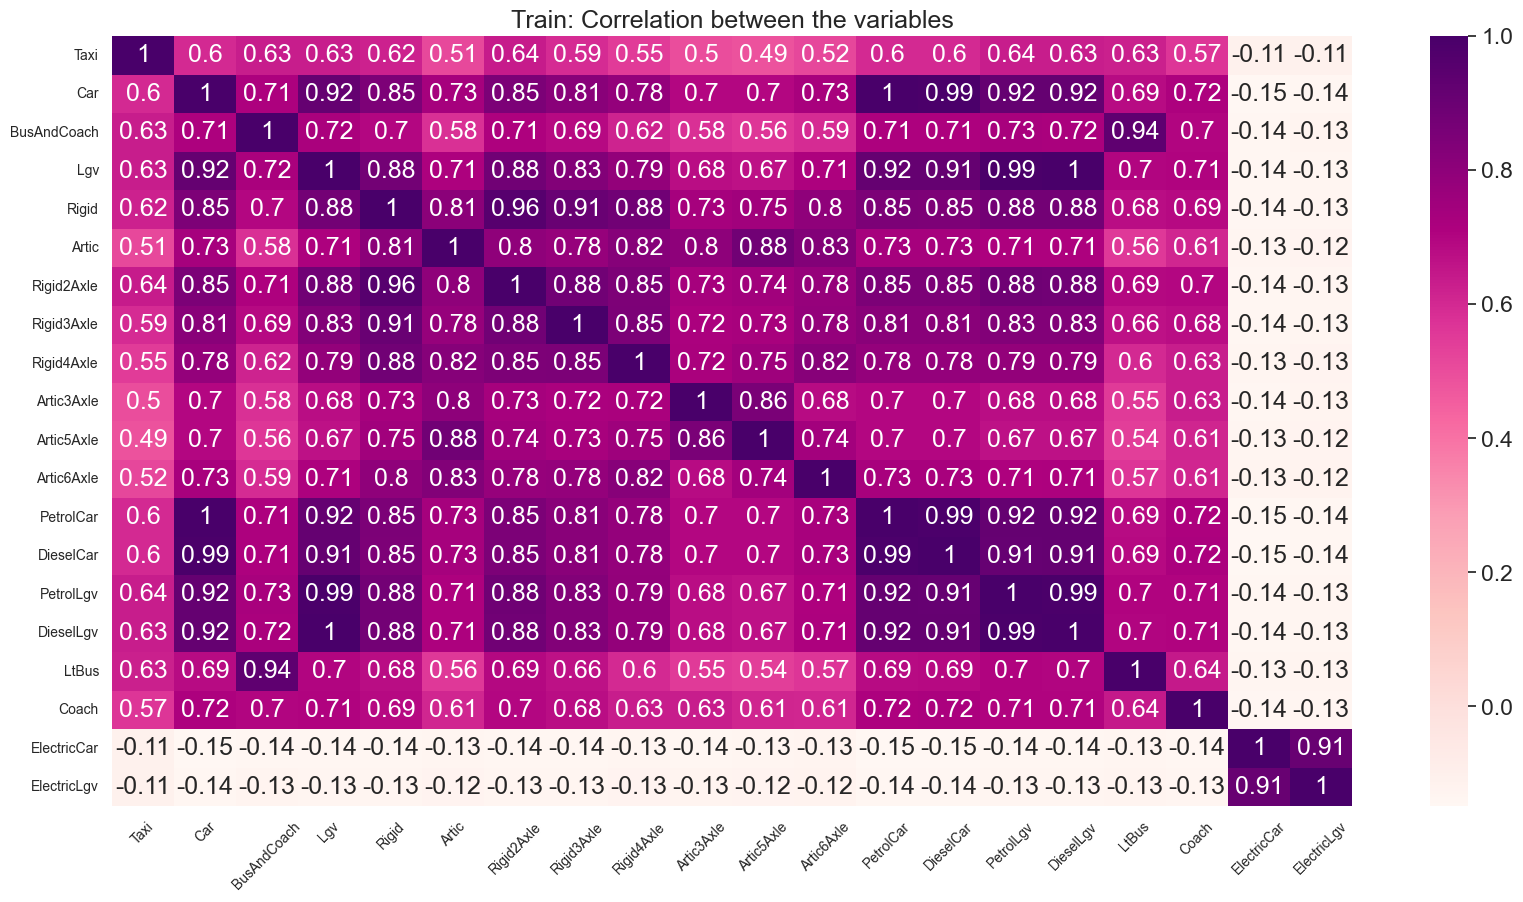

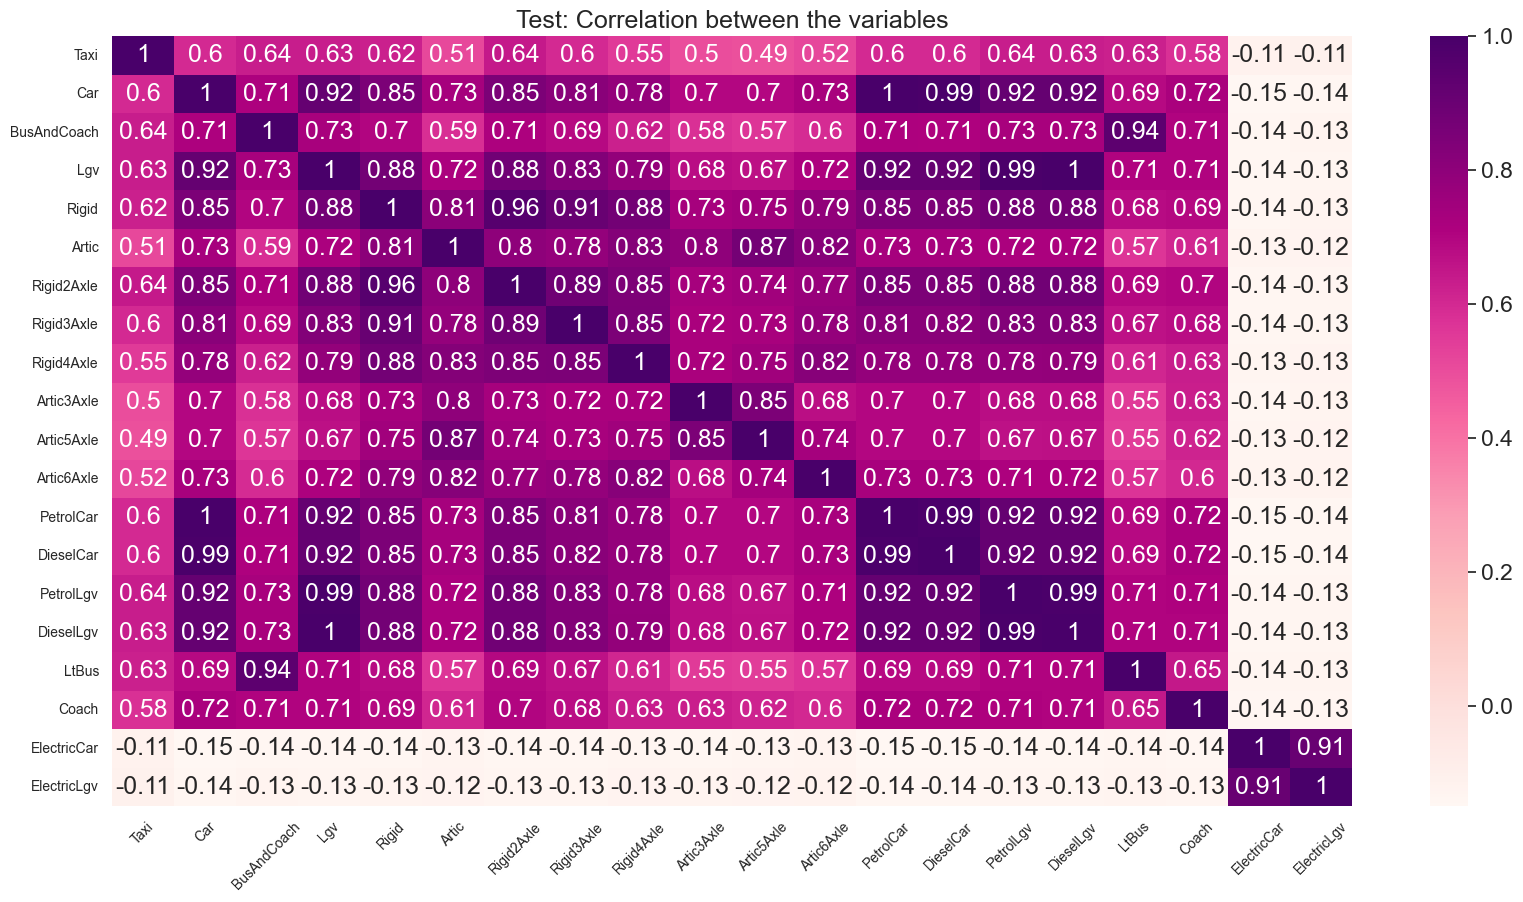

In [297]:
#correlation matrix and the heatmap

def confustion_matrix(df, title):
    plt.subplots(figsize=(20,10))
    vehicle_correlation=df.iloc[:,1:].corr()
    sns.heatmap(vehicle_correlation,annot=True,cmap='RdPu')
    plt.tick_params(axis='both', which='major', labelsize=10) 
    sns.set(font_scale=1.5)
    plt.title(f'{title}: Correlation between the variables')
    plt.xticks(rotation=45)

confustion_matrix(df_train_corr, 'Train')
confustion_matrix(df_test_corr, 'Test')

In [287]:
# Creating a function to pivot the dataframe

def pivot_func(df):
    
    df_melted = pd.melt(df, id_vars=['GridId', 'Pollutant'], value_vars=df.columns[2:])  

    
    df_pivot = df_melted.pivot_table(index=['GridId', 'variable'], columns='Pollutant', values='value', aggfunc='sum').reset_index()
    
    
    df_pivot = df_pivot.rename(columns={'variable': 'Vehicle'})
    
    return df_pivot
df_train = pivot_func(df_train)
df_test = pivot_func(df_test)

In [203]:
df_train.dropna(inplace=True)
df_test.dropna(inplace=True)

In [204]:
df_train['Emission sum'] = df_train.iloc[:, 2:].sum(axis=1)
df_test['Emission sum'] = df_test.iloc[:, 2:].sum(axis=1)

In [205]:
# Calculate statistics from training data
poll_total_med_train = df_train['Emission sum'].median()
poll_total_q1_train = df_train['Emission sum'].quantile(0.25)
poll_total_q3_train = df_train['Emission sum'].quantile(0.75)
poll_total_q1half_train = poll_total_q1_train + (poll_total_med_train - poll_total_q1_train)/2
poll_total_q2half_train = poll_total_med_train + (poll_total_q3_train - poll_total_med_train)/2





In [206]:
def categorize_emission(value):
    if value <= poll_total_q1_train:
        return 'very_low'
    elif poll_total_q1_train < value <= poll_total_q1half_train:
        return 'low'
    elif poll_total_q1half_train < value <= poll_total_med_train:
        return 'medium'
    elif poll_total_med_train < value <= poll_total_q2half_train:
        return 'medium_high'
    elif poll_total_q2half_train < value <= poll_total_q3_train:
        return 'high'
    else:
        return 'very_high'

df_train['Emission Category'] = df_train['Emission sum'].apply(categorize_emission)
df_test['Emission Category'] = df_test['Emission sum'].apply(categorize_emission)


In [207]:
df_train.drop(columns=['Emission sum'], inplace=True)
df_test.drop(columns=['Emission sum'], inplace=True)

In [208]:
df_train_corr=df_train.drop(columns=['GridId','Vehicle','Emission Category'])
df_test_corr=df_test.drop(columns=['GridId','Vehicle','Emission Category'])

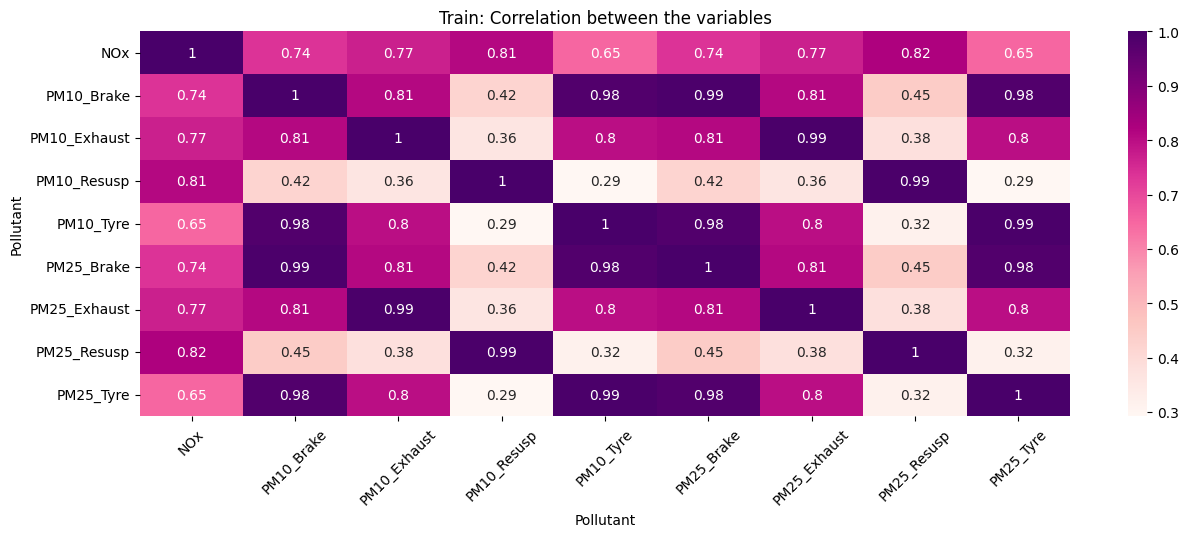

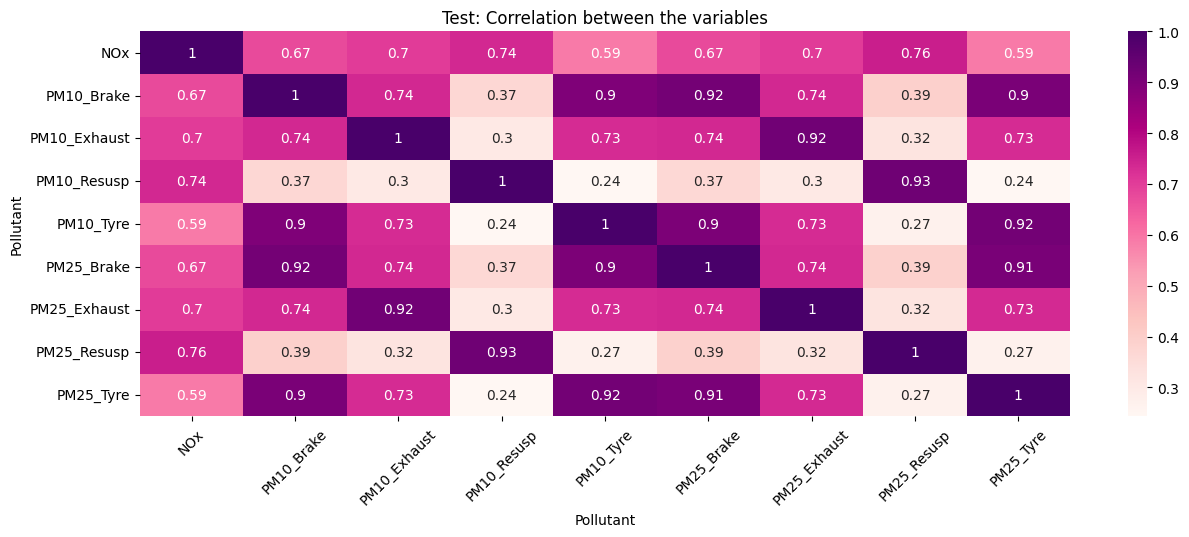

In [209]:
#correlation matrix and the heatmap

def confustion_matrix(df, title):
    plt.subplots(figsize=(15,5))
    vehicle_correlation=df.iloc[:,1:].corr()
    sns.heatmap(vehicle_correlation,annot=True,cmap='RdPu')
    plt.title(f'{title}: Correlation between the variables')
    plt.xticks(rotation=45)

confustion_matrix(df_train_corr, 'Train')
confustion_matrix(df_test_corr, 'Test')
    

In [210]:
df_test.drop(columns=['GridId','Vehicle'], inplace=True)
df_train.drop(columns=['GridId','Vehicle'], inplace=True)

In [211]:
col_name = "Emission Category"
first_col = df_train.pop(col_name)
df_train.insert(0, col_name, first_col)


In [212]:
col_name = "Emission Category"
first_col = df_test.pop(col_name)
df_test.insert(0, col_name, first_col)

In [213]:
# Split data of the training sample into features and target
keep_columns_train =df_train.columns[1:]
X_train = df_train[keep_columns_train]
y_train_labelled = df_train['Emission Category']

# Split data of the test sample into features and target

keep_columns_test = df_test.columns[1:]
X_test = df_test[keep_columns_test]
y_test_labelled= df_test['Emission Category']


# encode the target
le_target = LabelEncoder()
y_train = le_target.fit_transform(y_train_labelled)
y_test = le_target.transform(y_test_labelled)

In [214]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape 

((46431, 10), (34251, 10), (46431,), (34251,))

In [215]:
categorical_features = X_train.select_dtypes(exclude='number').columns.tolist()
categorical_features

[]

In [226]:
error_rate = []
from sklearn.model_selection import GridSearchCV
# Define the pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),          #Scaling the data
    ('kNN', KNeighborsClassifier()) #Train a KNN classifier
])


#grid search
k = [1,3,5,7,9,11,13]

grid = GridSearchCV(pipeline, param_grid={'kNN__n_neighbors': k , 'kNN__p':[1]}, cv=10, scoring='accuracy', return_train_score=True)
 
# Train the pipeline on training data
grid_search=grid.fit(X_train, y_train)


print("Best parameters found:", grid_search.best_params_)
print("Best accuracy:", grid_search.best_score_*100)

mean_test_scores = grid_search.cv_results_['mean_test_score']
error_rates = [1 - score for score in mean_test_scores]
mean_train_scores = grid_search.cv_results_['mean_train_score']
train_error_rates = [1 - score for score in mean_train_scores]

Best parameters found: {'kNN__n_neighbors': 7, 'kNN__p': 1}
Best accuracy: 93.7175748067488


In [159]:
# saving the model
import pickle
filename = 'knn_model_p2.sav'
pickle.dump(grid_search, open(filename, 'wb'))

In [160]:
# load the model from disk
filename = 'knn_model_p2.sav'
loaded_model = pickle.load(open(filename, 'rb'))

Creating a storage data frame to save metrics  

In [149]:
#df_training_scores = pd.DataFrame()

In [150]:
#df_training_scores['k'] = k

In [161]:
df_training_scores['error_rate_p2'] = error_rates

In [162]:
df_training_scores['mean_test_scores_p2'] = mean_test_scores

In [163]:
df_training_scores['mean_train_scores_p2'] = mean_train_scores

In [164]:
df_training_scores

k  error_rate_p1  mean_test_scores_p1  mean_train_scores_p1  \
0   1       0.076070             0.923930              1.000000   
1   3       0.068575             0.931425              0.969991   
2   5       0.063083             0.936917              0.959187   
3   7       0.062824             0.937176              0.954743   
4   9       0.062953             0.937047              0.952032   
5  11       0.063320             0.936680              0.949995   
6  13       0.063880             0.936120              0.947726   

   error_rate_p2  mean_test_scores_p2  mean_train_scores_p2  
0       0.081066             0.918934              1.000000  
1       0.075940             0.924060              0.966014  
2       0.072710             0.927290              0.953168  
3       0.072408             0.927592              0.947341  
4       0.071999             0.928001              0.943402  
5       0.072645             0.927355              0.940552  
6       0.073636             0.926364              0.937764

In [165]:
df_training_scores.to_csv('..\data\processed\df_training_scoresp2.csv', index=False)

In [166]:
#Savng the data
pd.DataFrame([grid_search.best_params_]).to_csv('..\data\processed\Knn_best_paramsP2.csv', index=False)

pd.DataFrame({'Best Score': [grid_search.best_score_]}).to_csv('..\data\processed\Knn_best_scoreP2.csv', index=False)


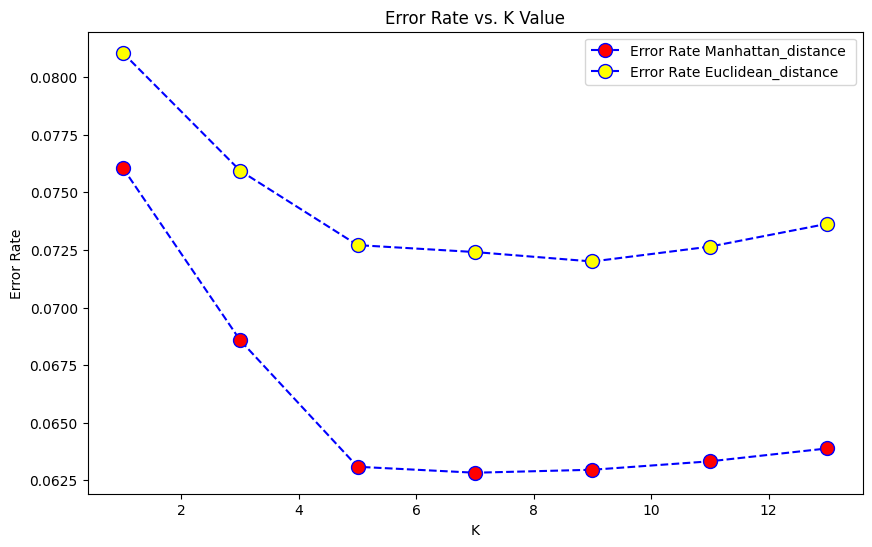

In [167]:
plt.figure(figsize=(10,6))
plt.plot(df_training_scores['k'],	df_training_scores['error_rate_p1'],color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10, label='Error Rate Manhattan_distance ')
plt.plot(df_training_scores['k'], df_training_scores['error_rate_p2'],color='blue', linestyle='dashed', marker='o', markerfacecolor='yellow', markersize=10, label='Error Rate Euclidean_distance ' )
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.legend(loc='upper right')
plt.show()

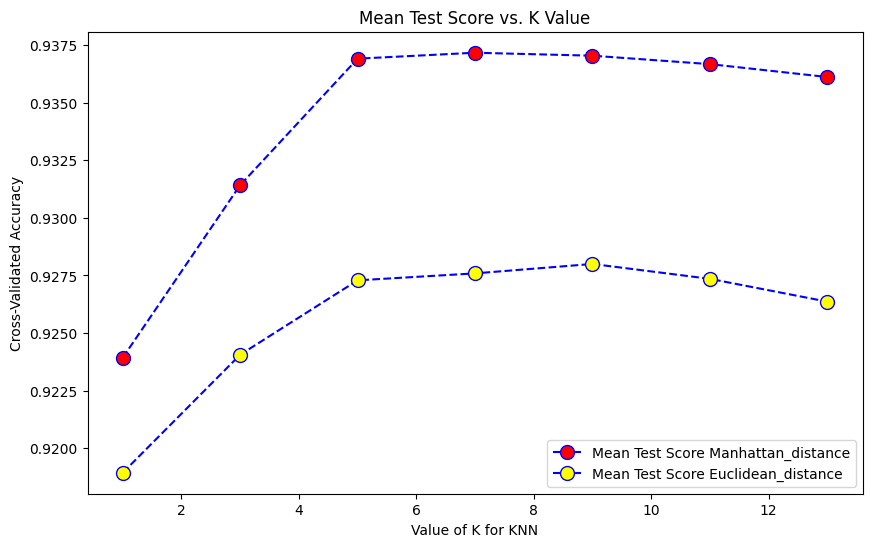

In [168]:
plt.figure(figsize=(10,6))
plt.plot(k, df_training_scores['mean_test_scores_p1'], label='Mean Test Score Manhattan_distance', color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.plot(k, df_training_scores['mean_test_scores_p2'], label='Mean Test Score Euclidean_distance ', color='blue', linestyle='dashed', marker='o', markerfacecolor='yellow', markersize=10)
plt.title('Mean Test Score vs. K Value')
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.legend(loc='lower right')
plt.show()

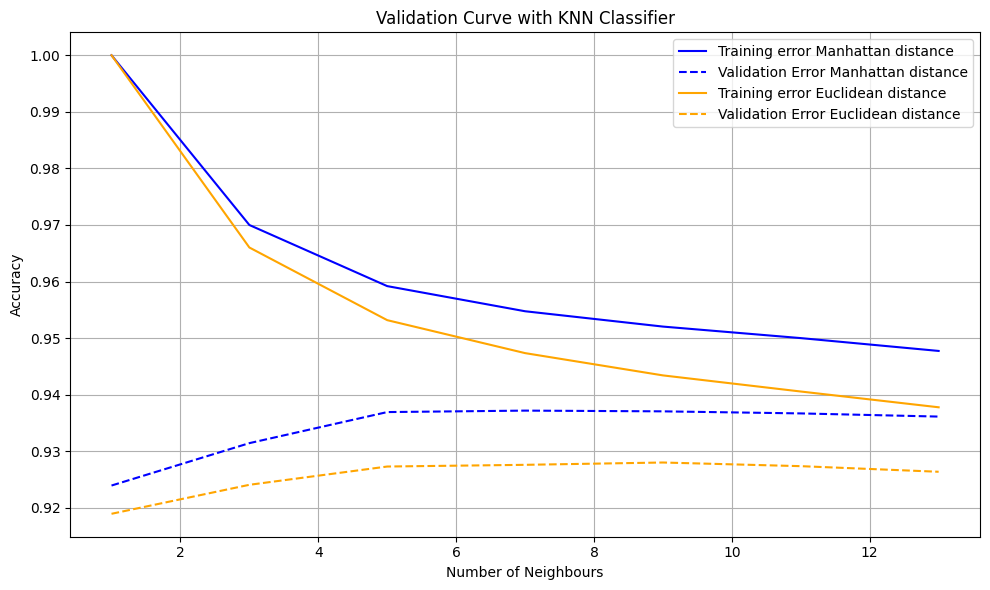

In [169]:
# Plotting the validation curve
plt.figure(figsize=(10, 6))
plt.plot(k, df_training_scores['mean_train_scores_p1'], label='Training error Manhattan distance', linestyle='-', color='blue')
plt.plot(k, df_training_scores['mean_test_scores_p1'], label='Validation Error Manhattan distance', linestyle='--', color='blue')
plt.plot(k, df_training_scores['mean_train_scores_p2'], label='Training error Euclidean distance', linestyle='-', color='orange')
plt.plot(k, df_training_scores['mean_test_scores_p2'], label='Validation Error Euclidean distance', linestyle='--', color='orange')
plt.title("Validation Curve with KNN Classifier")
plt.xlabel("Number of Neighbours")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


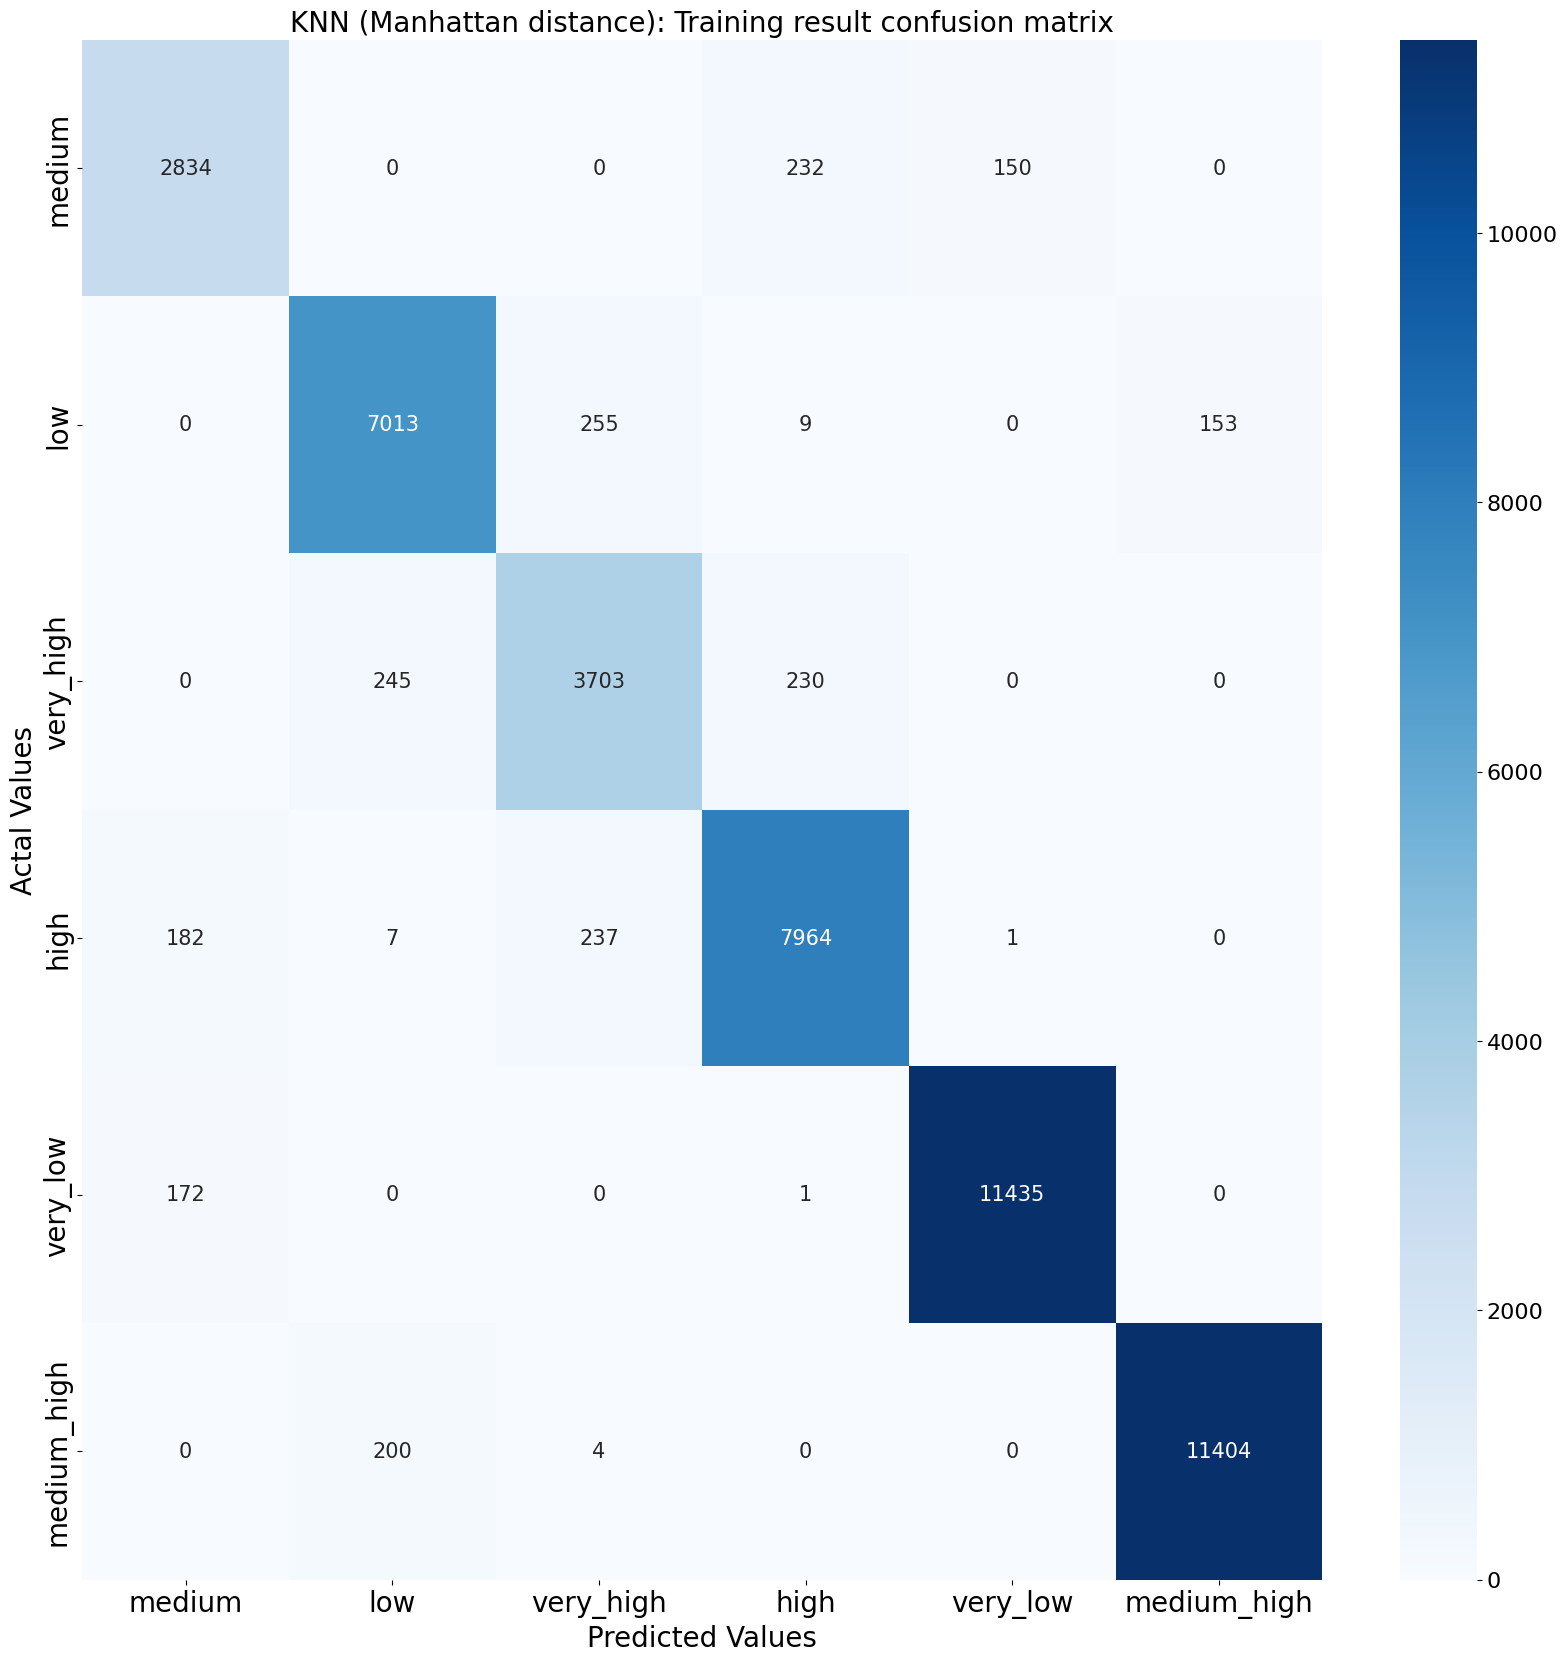

In [227]:
from sklearn.metrics import confusion_matrix
# Confusion matrix for training data
y_train_pred = grid_search.predict(X_train)
cm = confusion_matrix(y_train,y_train_pred)
cm_df = pd.DataFrame(cm, index=y_train_labelled.unique(), columns=y_train_labelled.unique())
#Plotting the confusion matrix
plt.figure(figsize=(20,20))
sns.heatmap(cm_df, annot=True, annot_kws={"size": 15}, fmt='g', cmap='Blues')
plt.tick_params(axis='both', which='major', labelsize=20) 
plt.title('KNN (Manhattan distance): Training result confusion matrix', fontsize=20)
plt.ylabel('Actal Values', fontsize=20)
plt.xlabel('Predicted Values', fontsize=20)
plt.show()



Testing the model

In [228]:

# test the pipeline on testing data
y_pred = grid_search.predict(X_test)

test_accuracy=accuracy_score(y_test,y_pred)*100

print("Accuracy for our testing dataset with tuning is : {:.2f}%".format(test_accuracy) )


Accuracy for our testing dataset with tuning is : 83.78%


In [229]:
#save classification report
print(classification_report(y_test, y_pred), file=open('..\data\processed\KNN_classification_report.txt', 'w'))

In [230]:
# Evaluate the model
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.68      0.66      2174
           1       0.80      0.80      0.80      6996
           2       0.60      0.58      0.59      2817
           3       0.79      0.84      0.81      5704
           4       0.93      0.89      0.91      4277
           5       0.95      0.93      0.94     12283

    accuracy                           0.84     34251
   macro avg       0.78      0.79      0.78     34251
weighted avg       0.84      0.84      0.84     34251



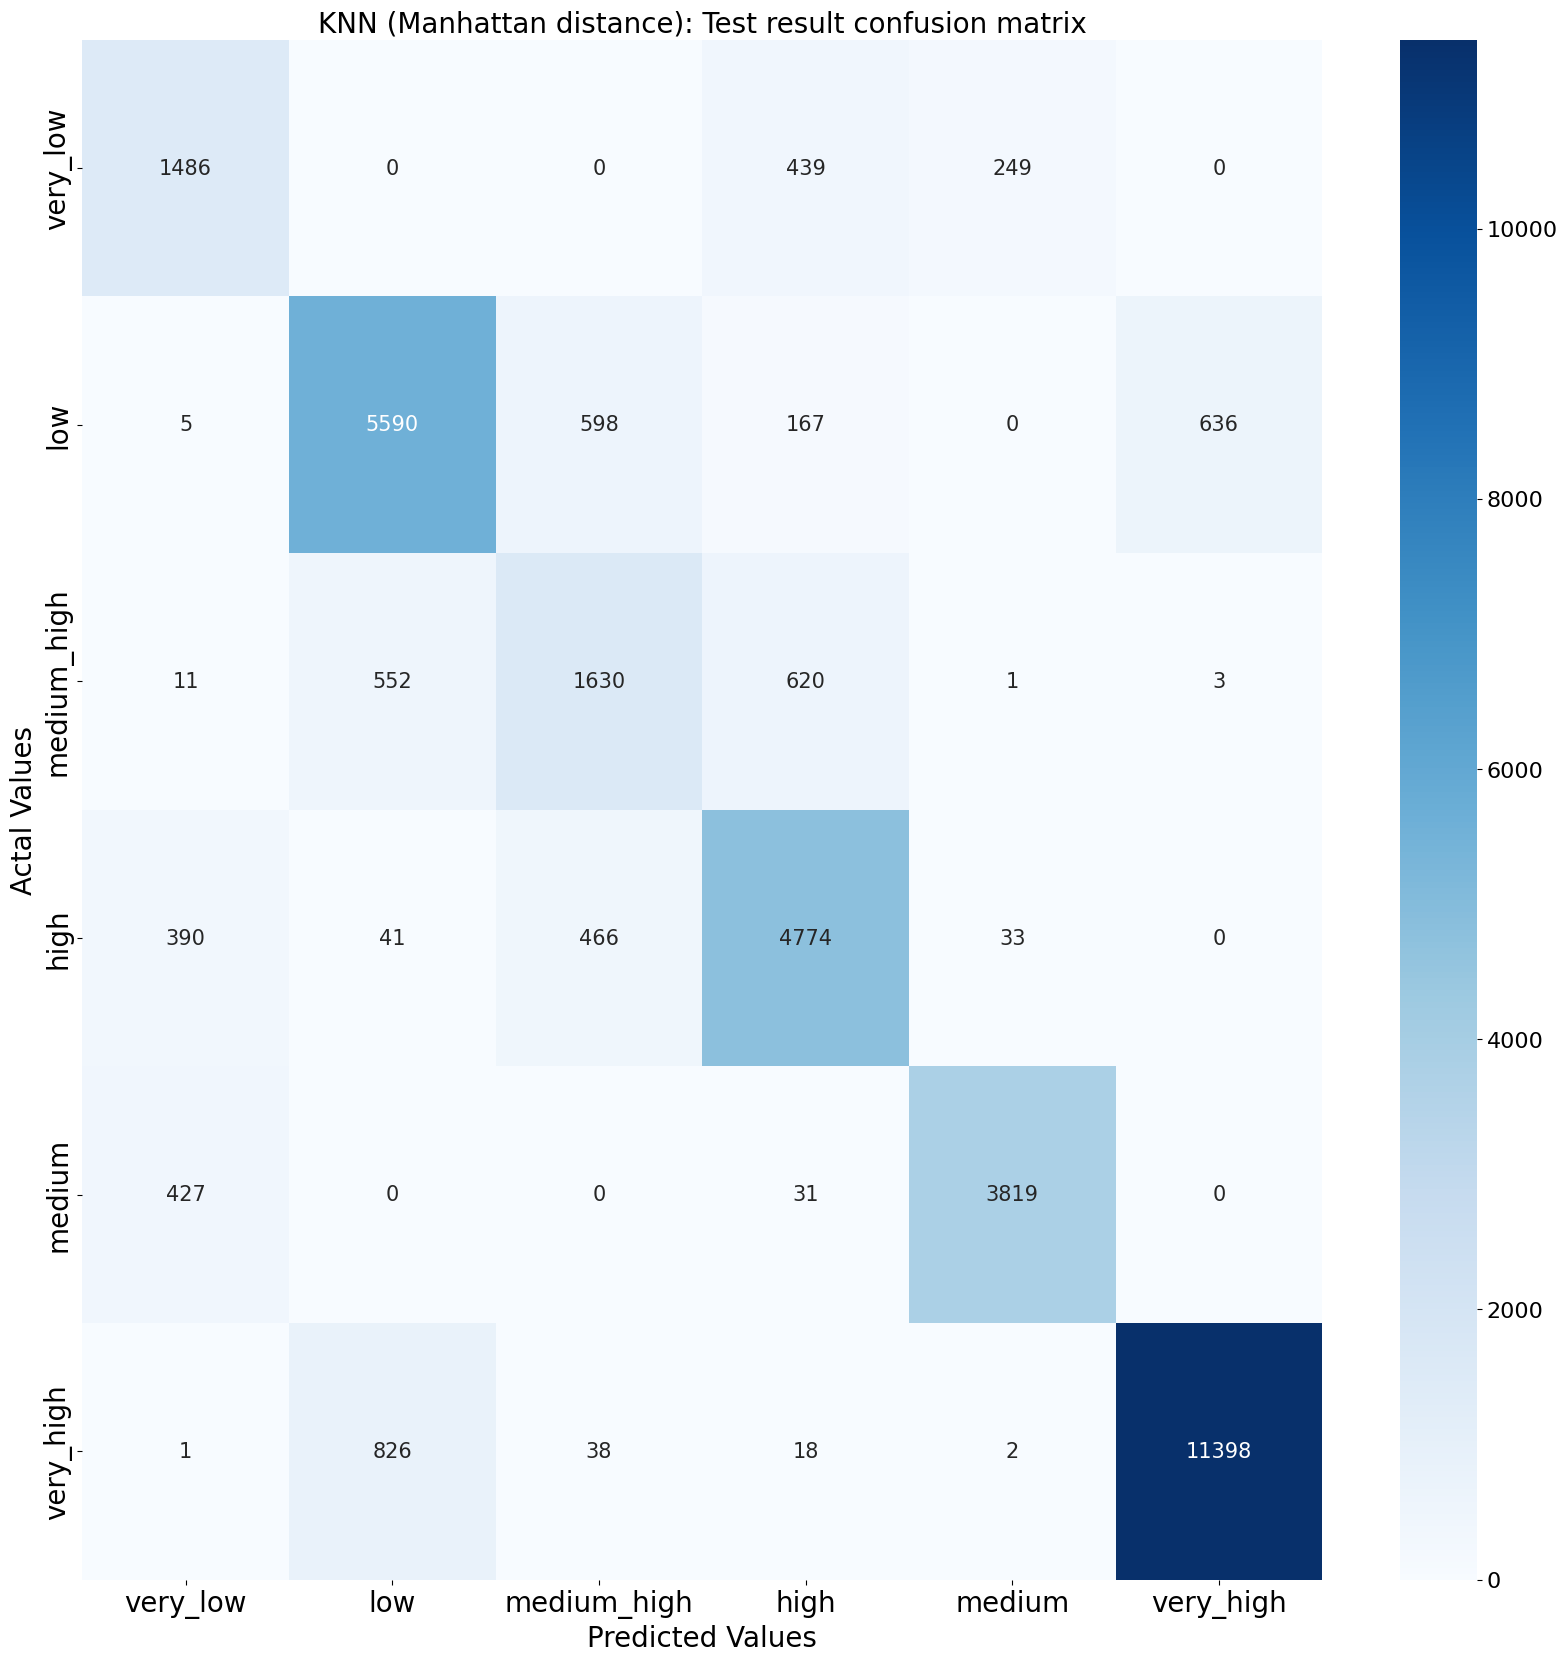

In [231]:
# Confusion matrix for training data
x_test_pred = grid_search.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
cm_df = pd.DataFrame(cm, index=y_test_labelled.unique(), columns=y_test_labelled.unique())
#Plotting the confusion matrix
plt.figure(figsize=(20,20))
sns.heatmap(cm_df, annot=True , annot_kws={"size": 15}, fmt='g', cmap='Blues')
plt.tick_params(axis='both', which='major', labelsize=20) 
plt.title('KNN (Manhattan distance): Test result confusion matrix', fontsize=20)
plt.ylabel('Actal Values', fontsize=20)
plt.xlabel('Predicted Values',  fontsize=20)
plt.show()
